### Project Description

With the given dataset, build a model to predict 'audience_rating'. Demonstrate the working of the pipeline with a notebook, also validate the model for its accuracy.

# Data Storage



1. **movie_title:** The official title of the movie.

2. **movie_info:** A brief synopsis or plot summary of the movie.

3. **critics_consensus:** A summary of critical reviews and opinions about the movie.

4. **rating:** The overall rating of the movie, often a numerical value or a rating system like PG-13, R, etc.



5. **genre:** The primary genre or category of the movie, such as Action, Comedy, Drama, etc.

6. **directors:** The director(s) responsible for the movie's creative vision.

7. **writers:** The writer(s) who penned the screenplay or script for the movie.

8. **cast:** A list of the main actors and actresses in the movie.

9. **in_theaters_date:** The date when the movie was first released in theaters.

10. **on_streaming_date:** The date when the movie became available on streaming platforms.

11. **runtime_in_minutes:** The total duration of the movie in minutes.

12. **studio_name:** The production studio or company responsible for the movie.

13. **tomatometer_status:** The overall status of the movie's reviews on Rotten Tomatoes, often indicated as "Certified Fresh" or "Rotten."

14. **tomatometer_rating:** The numerical rating of the movie on Rotten Tomatoes, based on critical reviews.

15. **tomatometer_count:** The total number of reviews considered for the Tomatometer rating.

16. **audience_rating:** The rating of the movie by the general audience, often expressed as a percentage or a star rating.


# Problem Statement:
    To Predict Audience Rating

In [204]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load The Dataset

In [205]:
#Read the Excel file into DataFrame
df=pd.read_excel(r"C:\Users\surie\Downloads\Rotten_Tomatoes_Movies3.xls")
df

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,Zoot Suit,"Based on a 1940s Los Angeles murder trial, thi...",NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,2003-05-27,104.0,MCA Universal Home Video,Rotten,56,9,74.0
16634,Zootopia,The modern mammal metropolis of Zootopia is a ...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016-03-04,2016-06-07,108.0,Walt Disney Animation Studios,Certified Fresh,97,279,92.0
16635,Zorba the Greek,If ever there was a role that Anthony Quinn wa...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,2004-08-03,142.0,Fox,Fresh,78,9,87.0
16636,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",NaN,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,2001-02-02,139.0,Paramount Pictures,Fresh,95,21,91.0


# 1.EDA Exploratory Data Analysis

In [206]:
df.head(10) #Display First 10 rows

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0
5,"10,000 B.C.",A young outcast from a primitive tribe is forc...,With attention strictly paid to style instead ...,PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,"Roland Emmerich, Harald Kloser","Steven Strait, Camilla Belle, Cliff Curtis, Jo...",2008-03-07,2008-06-24,109.0,Warner Bros. Pictures,Rotten,8,148,37.0
6,The 39 Steps,A man in London tries to help a counterespiona...,"Packed with twists and turns, this essential e...",NR,"Action & Adventure, Classics, Mystery & Suspense",Alfred Hitchcock,"Alma Reville, Charles Bennett, Ian Hay","Robert Donat, Madeleine Carroll, Godfrey Tearl...",1935-08-01,1935-06-06,87.0,Gaumont British Distributors,Certified Fresh,96,47,86.0
7,3:10 to Yuma,"Desperate for money, frontier rancher Van Hefl...",NaN,NR,"Classics, Drama, Western",Delmer Daves,Halsted Welles,"Glenn Ford, Van Heflin, Felicia Farr, Leora Da...",1957-08-07,2002-04-02,92.0,Columbia Pictures,Fresh,96,27,78.0
8,Charly (A Heartbeat Away),Sam Roberts thinks he has all the answers: the...,NaN,PG,"Comedy, Drama, Romance",Adam Thomas Anderegg,"Jack Weyland, Janine Whetton Gilbert","Heather Beers, Gary Neilson, Lisa McCammon, Ja...",2002-09-27,2003-08-01,103.0,Excel Entertainment,Rotten,20,10,87.0
9,Abraham Lincoln,"To date, this D.W. Griffith epic is the only t...",NaN,NR,"Classics, Drama",D.W. Griffith,"Gerrit J. Lloyd, Stephen Vincent Ben√©t","Walter Huston, Una Merkel, Kay Hammond, Ian Ke...",1930-11-08,2008-11-18,97.0,United Artists,Fresh,90,10,38.0


In [207]:
df.tail(10) #Display Last 10 rows

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
16628,Zoo,In 1941 marksmen from the Royal Ulster Constab...,NaN,PG,"Action & Adventure, Kids & Family",Colin McIvor,Colin McIvor,"Art Parkinson, Penelope Wilton, Toby Jones, Am...",2018-06-08,2018-06-08,96.0,Samuel Goldwyn Films,Fresh,88,17,62.0
16629,Zookeeper,"In Zookeeper, the animals at the Franklin Park...",Zookeeper smothers Kevin James's with a sodden...,PG,"Comedy, Romance","Frank Coraci, Walt Becker","Jay Scherick, David Ronn, Nick Bakay, Rock Reu...","Kevin James, Rosario Dawson, Ken Jeong, Leslie...",2011-07-08,2011-10-11,101.0,Columbia Pictures,Rotten,14,131,41.0
16630,Zoolander,"Comic actor Ben Stiller co-wrote, directed, an...","A wacky satire on the fashion industry, Zoolan...",PG-13,"Comedy, Special Interest",Ben Stiller,"Drake Sather, John Hamburg, Ben Stiller","Ben Stiller, Owen Wilson, Will Ferrell, Christ...",2001-09-28,2002-03-12,105.0,Paramount Pictures,Fresh,64,137,80.0
16631,Zoolander 2,Ben Stiller returns both in front of and behin...,Zoolander No. 2 has more celebrity cameos than...,PG-13,Comedy,Ben Stiller,"Justin Theroux, Ben Stiller, Nicholas Stoller,...","Ben Stiller, Owen Wilson, Will Ferrell, Penelo...",2016-02-12,2016-05-24,102.0,Paramount Pictures,Rotten,23,226,20.0
16632,Zoom,Former superhero Jack is called back to work t...,Lacking the punch and good cheer of The Incred...,PG,"Action & Adventure, Comedy, Kids & Family",Peter Hewitt,"Adam Rifkin, David Berenbaum","Tim Allen, Courteney Cox, Chevy Chase, Spencer...",2006-08-11,2007-09-02,88.0,Sony Pictures Entertainment,Rotten,3,66,33.0
16633,Zoot Suit,"Based on a 1940s Los Angeles murder trial, thi...",NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,2003-05-27,104.0,MCA Universal Home Video,Rotten,56,9,74.0
16634,Zootopia,The modern mammal metropolis of Zootopia is a ...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016-03-04,2016-06-07,108.0,Walt Disney Animation Studios,Certified Fresh,97,279,92.0
16635,Zorba the Greek,If ever there was a role that Anthony Quinn wa...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,2004-08-03,142.0,Fox,Fresh,78,9,87.0
16636,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",NaN,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,2001-02-02,139.0,Paramount Pictures,Fresh,95,21,91.0
16637,Zulu Dawn,"A prequel to Zulu, Zulu Dawn depicts the event...",NaN,PG,"Action & Adventure, Art House & International,...",Douglas Hickox,"Cy Endfield, Anthony Storey","Burt Lancaster, Peter O'Toole, Simon Ward, Joh...",1979-12-14,2005-09-27,117.0,Tango Entertainment,Rotten,57,7,62.0


**==>The Rotten Tomatoes Movies dataset information about movie ratings of the audience**

### 1.1 Dimension of the dataset

In [208]:
df.shape #Checking the dimension of the dataset

(16638, 16)

The Dataset Contains **16638 rows and 16 Columns**

### 1.2 Columns of the Dataset

In [209]:
print(f"Column names:{df.columns}")

Column names:Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'runtime_in_minutes', 'studio_name', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating'],
      dtype='object')


Among these, the variables 'audience_rating' is designated as targets for distinct analytical approach. The remaining 15 variables serve as independent variables, as outlined in the Project Description section.


we aim to analyze **'audience_rating' as a regression problem**,it contains continous variable  during the Exploratory Data Analysis (EDA) phase

### 1.3 Data Type of the column

In [210]:
#Checking the Data types of the column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

This dataset contains

==>**10 object(string)** value columns

==>**2 float64** value columns

==>**2 int64(integers)** value columns

==>**2 datetime64** value columns

The dataset **presents null values** in movie_info,critics_consensus,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,audience_rating.

In [211]:
# List object variables
object_vars = df.select_dtypes(include='object').columns.tolist()
print(f"Object/Categorical variables:\n{object_vars}\n{len(object_vars)} in total\n")

# List int64 variables
int_vars = df.select_dtypes(include='int64').columns.tolist()
print(f"int64 variables:\n{int_vars}\n{len(int_vars)} in total\n")

# List float64 variables
float_vars = df.select_dtypes(include='float64').columns.tolist()
print(f"float64 variables:\n{float_vars}\n{len(float_vars)} in total\n")


# List float64 variables
datetime64_vars = df.select_dtypes(include='datetime64').columns.tolist()
print(f"datetime64 variables:\n{datetime64_vars}\n{len(datetime64_vars)} in total\n")



Object/Categorical variables:
['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre', 'directors', 'writers', 'cast', 'studio_name', 'tomatometer_status']
10 in total

int64 variables:
['tomatometer_rating', 'tomatometer_count']
2 in total

float64 variables:
['runtime_in_minutes', 'audience_rating']
2 in total

datetime64 variables:
['in_theaters_date', 'on_streaming_date']
2 in total



# 1.4 Missing Values

### 1.4.1 Inspecting The dataset

In [212]:
#Checking the null values

missing_val=df.isnull().sum().to_frame("Null Values")

#Calculate the % of the null values

missing_val["% of missing Values"]=round(missing_val['Null Values'] / len(df) * 100, 2)

missing_val

,Null Values,% of missing Values
movie_title,0,0.00
movie_info,24,0.14
critics_consensus,8329,50.06
rating,0,0.00
genre,17,0.10
directors,114,0.69
writers,1349,8.11
cast,284,1.71
in_theaters_date,815,4.90
on_streaming_date,2,0.01


In [213]:
print(f"The dataset presents {df.isnull().sum().sum()} missing values.")

The dataset presents 11757 missing values.


After my initial Inspection , it seems the dataset is  incomplete.

The missing values will be treated in further sections, but first, we will do EDA.

### 1.4.2 Heatmap with missing Values

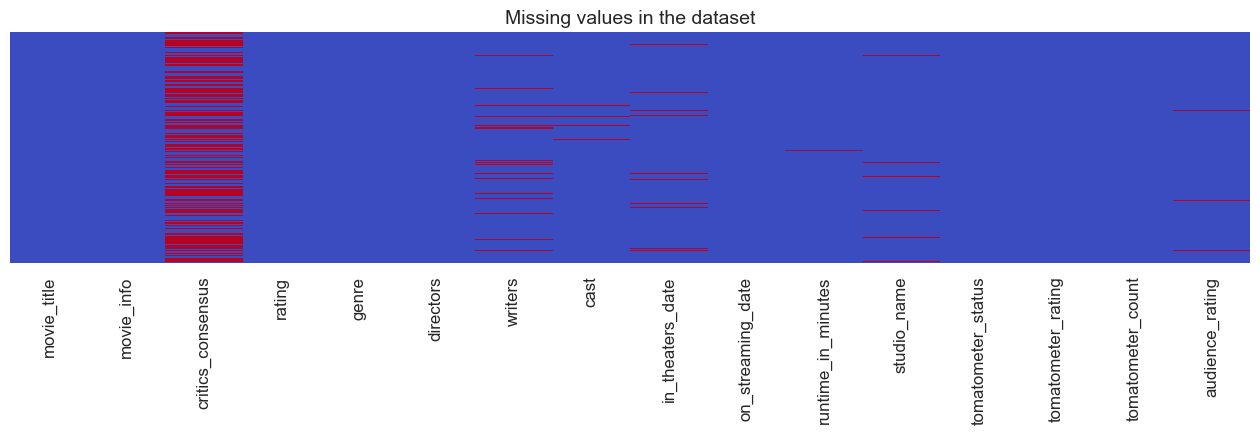

In [214]:
#Style settings
sns.set_style("whitegrid")
sns.set(font_scale=1.1)
sns.set_palette("vlag")
plt.figure(figsize=(16,3))

#Let's visualize it using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cmap='coolwarm',cbar=False)
plt.title('Missing values in the dataset',fontsize=14);

# 1.5 Feature Analysis

### 1.5.1 Unique Analysis

In [215]:
#Reviewing the number of unique values in each feature and the target
info_df=df.nunique().to_frame("No. of Unique values")
info_df['type']=df.dtypes.values

# List of categorical variables
display(info_df[(info_df['type'] == 'object')])
display(info_df[(info_df['type'] != 'object')])

,No. of Unique values,type
movie_title,16106,object
movie_info,16613,object
critics_consensus,8307,object
rating,8,object
genre,1080,object
directors,8314,object
writers,12121,object
cast,16326,object
studio_name,2886,object
tomatometer_status,3,object


,No. of Unique values,type
in_theaters_date,5586,datetime64[ns]
on_streaming_date,2260,datetime64[ns]
runtime_in_minutes,201,float64
tomatometer_rating,101,int64
tomatometer_count,393,int64
audience_rating,98,float64


Regarding the number of unique values in the dataset:

==>We can confidently drop 'movie_title' because it serves no analytical purpose and behaves as an identifier rather than a feature contributing to numerical or categorical insights.

==>"movie_info" can be dropped as it is redundant and has high cardinality, similar to movie_title, offering no added analytical value(can be useful for NLP analysis later).

==>"critics_consensus" can be dropped as it is text-based with high cardinality, making it unsuitable for numerical or categorical analysis(can be useful for NLP analysis later).

==>"cast" can be dropped due to extremely high cardinality (16,326 unique values), making it impractical for analysis unless specifically analyzing actor-based trends or creating an actor-specific model.

==>"writers" can be dropped as it has high cardinality (12,121 unique values), offering little value in general analysis. It would only be useful in highly specific analyses, like studying the impact of writers on movie performance.

==>"directors" Similar to cast and writers, directors has high cardinality (8,314 unique values), which makes it impractical for broader analysis unless you're analyzing trends related to directors' influence on ratings or movie genres.

==>"studio_name" can be dropped due to high cardinality (2,886 unique values), making it challenging to use for analysis. It would only be relevant in studio-based trend analysis, which is a very specific use case.

==>"rating" can be kept, as it is a categorical feature with 8 unique values that provide valuable insights into movie classifications (e.g., G, PG, PG-13, R). It can be used for segmenting movies, analyzing trends based on ratings, and performing categorical analysis, making it relevant for further analysis.

==>"tomatometer_status" can be kept, as it is a categorical feature with 3 unique values, likely representing the status of the movie's review (e.g., certified fresh, rotten, or others). It provides valuable information for analyzing movie performance based on critic reviews and is useful for segmentation and classification in analysis.

==>"in_theaters_date" can be kept, as it is a datetime feature with 5,586 unique values, providing valuable information for time-based analysis. It allows for trend analysis, seasonality, and insights into movie release patterns, helping to analyze performance over time or correlate with other time-dependent features.

==>"on_streaming_date" can be kept, as it is a datetime feature that provides valuable insights into when a movie became available on streaming platforms. This allows for time-based analysis, such as examining the impact of streaming release dates on movie performance and viewing patterns. It is useful for analyzing trends in digital distribution.

==>"runtime_in_minutes" can be kept, as it is a numerical feature that provides valuable insights into movie length. It can be used for correlation analysis, exploring relationships between movie length and factors like ratings, audience reception, or box office performance. It is a useful variable for both regression analysis and feature engineering.

==>"tomatometer_rating" can be kept, as it is a numerical feature that represents the critic score (percentage) of the movie. It provides valuable insights into how critics perceive the movie, making it useful for analysis on the relationship between critic ratings and audience reception, box office performance, or overall movie success.

==>"tomatometer_count" can be kept, as it represents the number of critic reviews that contributed to the tomatometer score. This numerical feature provides insights into the reliability and strength of the critic rating, making it useful for analyzing the impact of review volume on movie success or comparing the consistency of critic opinions across movies.

==>"audience_rating" can be kept, as it is a numerical feature representing the average audience rating. It provides valuable insights into how the general audience perceives the movie, which can be useful for analysis on the relationship between audience reception and other variables like box office performance or critic reviews. Since it is continuous and numerical, it is appropriate for **regression-based models and analysis.**

Next, we will remove the columns 'movie_title', 'movie_info', 'critics_consensus','cast','writers','directors','studio_name' for the reasons explained previously.

In [216]:
df.drop(['movie_title','movie_info','critics_consensus','directors','writers','cast','studio_name'],axis=1,inplace=True)
display(df.sample(5))

,rating,genre,in_theaters_date,on_streaming_date,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
14457,NR,"Action & Adventure, Drama, Western",2016-12-16,2017-08-01,139.0,Rotten,50,12,77.0
14208,R,"Drama, Mystery & Suspense",2013-08-23,2014-02-03,84.0,Rotten,33,9,29.0
5473,NR,Mystery & Suspense,2017-05-26,2017-07-04,91.0,Rotten,27,11,25.0
5166,R,"Action & Adventure, Drama",2002-05-03,2002-08-06,97.0,Rotten,3,75,51.0
7584,R,"Art House & International, Drama, Special Inte...",2008-12-05,2010-02-16,92.0,Certified Fresh,90,127,83.0


In [217]:
print(f" The rows and columns in the dataset: {df.shape}")

 The rows and columns in the dataset: (16638, 9)


Now the dataset contains 16638 rows and 9 columns. The target variables and independent variables.

### 1.5.1.1 audience_rating for Unique values

In [218]:
# Inspect the unique values of the target variable
column = 'audience_rating'
print(f"Feature {column}:\n{df[column].value_counts(dropna=False)}\n")
print(f"Unique values: {sorted(df[column].unique())}\n")

Feature audience_rating:
audience_rating
72.0    322
75.0    314
78.0    296
80.0    289
76.0    287
       ... 
8.0       5
7.0       4
99.0      3
4.0       2
6.0       2
Name: count, Length: 99, dtype: int64

Unique values: [20.0, 24.0, 29.0, 30.0, 31.0, 33.0, 35.0, 36.0, 37.0, 38.0, 40.0, 42.0, 43.0, 48.0, 53.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 70.0, 71.0, 73.0, 74.0, 75.0, 77.0, 78.0, 79.0, 80.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 91.0, 93.0, 94.0, 97.0, nan, 0.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 21.0, 22.0, 23.0, 25.0, 26.0, 27.0, 28.0, 32.0, 34.0, 39.0, 41.0, 44.0, 45.0, 46.0, 47.0, 49.0, 50.0, 51.0, 52.0, 54.0, 62.0, 69.0, 72.0, 76.0, 81.0, 90.0, 92.0, 95.0, 96.0, 98.0, 99.0, 100.0]



The target variable 'audience_rating' has 90 unique values of the 16638 rows in the dataset. In order to predict this feature we need to build a regression model.

### 1.5.1.2 Independent variables unique values

We will separate the numerical discrete variables from the continuous

In [219]:
# Separating Numerical and Categorical columns
categorical_col =  df.select_dtypes(include='object').columns.tolist()
numerical_col =  [col for col in df.select_dtypes(include=np.number).columns.tolist()]
datetime_col = df.select_dtypes(include='datetime').columns.tolist()

# Remove the target variables since they will be analyzed separately
numerical_col.remove('audience_rating')

#  Numerical and Categorical columns
print(f"Categorical Columns:\n {categorical_col}\n")
print(f"Numerical Columns:\n {numerical_col}\n")
print(f"Datetime Columns:\n {datetime_col}\n")

Categorical Columns:
 ['rating', 'genre', 'tomatometer_status']

Numerical Columns:
 ['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count']

Datetime Columns:
 ['in_theaters_date', 'on_streaming_date']



### Categorical columns

In [220]:
for i, column in enumerate(categorical_col):
    print(f"{i+1}.Feature {column}:\n{df[column].value_counts(dropna=False)}\n")
    print(f"# unique values: {df[column].nunique()}\n")

1.Feature rating:
rating
R         6136
NR        4862
PG-13     2885
PG        2062
G          652
NC17        37
PG-13)       3
R)           1
Name: count, dtype: int64

# unique values: 8

2.Feature genre:
genre
Drama                                                                                       1727
Comedy                                                                                      1202
Comedy, Drama                                                                                819
Drama, Mystery & Suspense                                                                    683
Art House & International, Drama                                                             571
                                                                                            ... 
Action & Adventure, Art House & International, Cult Movies, Drama                              1
Animation, Art House & International, Drama, Science Fiction & Fantasy, Special Interest       1
Drama, Ki

In [221]:
# List of main genres
main_genres = ['drama', 'action', 'thriller', 'fantasy', 
               'adventure', 'horror', 'romance', 'animation', 'science fiction','comedy','documentary']

# Function to map each genre to one or more main categories
def map_genre(genre):
    if isinstance(genre, str):  # Check if genre is a valid string
        genre = genre.lower()  # Convert to lowercase for consistency
        for main_genre in main_genres:
            if main_genre in genre:
                return main_genre.capitalize()  # Return the matched main genre
    return 'Other'  # If no match or genre is NaN, categorize as 'Other'

# Apply the mapping function to the 'genre' column
df['mapped_genre'] = df['genre'].apply(map_genre)

# Check the distribution of the mapped genres
print(df['mapped_genre'].value_counts())


mapped_genre
Drama          9006
Comedy         1746
Action         1732
Documentary    1538
Horror         1035
Fantasy         587
Romance         430
Other           355
Animation       209
Name: count, dtype: int64


The 1,080 unique genre values are consolidated into **9 clean categories**.It ensures proper handling of NaN and unmatched genres

In [222]:
df.head(5)

,rating,genre,in_theaters_date,on_streaming_date,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,mapped_genre
0,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,2010-06-29,83.0,Rotten,49,144,53.0,Drama
1,R,Comedy,2010-04-30,2010-10-19,90.0,Certified Fresh,86,140,64.0,Comedy
2,R,"Comedy, Romance",1979-10-05,1997-08-27,118.0,Fresh,68,22,53.0,Romance
3,NR,"Classics, Drama",1957-04-13,2001-03-06,95.0,Certified Fresh,100,51,97.0,Drama
4,G,"Action & Adventure, Drama, Kids & Family",1954-01-01,2003-05-20,127.0,Fresh,89,27,74.0,Drama


In [223]:
#Dropping genre column
df = df.drop(columns=['genre'])

In [224]:
df.head(10)

,rating,in_theaters_date,on_streaming_date,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,mapped_genre
0,PG,2010-02-12,2010-06-29,83.0,Rotten,49,144,53.0,Drama
1,R,2010-04-30,2010-10-19,90.0,Certified Fresh,86,140,64.0,Comedy
2,R,1979-10-05,1997-08-27,118.0,Fresh,68,22,53.0,Romance
3,NR,1957-04-13,2001-03-06,95.0,Certified Fresh,100,51,97.0,Drama
4,G,1954-01-01,2003-05-20,127.0,Fresh,89,27,74.0,Drama
5,PG-13,2008-03-07,2008-06-24,109.0,Rotten,8,148,37.0,Drama
6,NR,1935-08-01,1935-06-06,87.0,Certified Fresh,96,47,86.0,Action
7,NR,1957-08-07,2002-04-02,92.0,Fresh,96,27,78.0,Drama
8,PG,2002-09-27,2003-08-01,103.0,Rotten,20,10,87.0,Drama
9,NR,1930-11-08,2008-11-18,97.0,Fresh,90,10,38.0,Drama


In [225]:
df.shape

(16638, 9)

### Numerical columns

In [226]:
for i, column in enumerate(numerical_col):
    print(f"{i+1}.Feature {column}:\n{df[column].value_counts()}\n")
    print(f"# unique values: {df[column].nunique()}\n")

1.Feature runtime_in_minutes:
runtime_in_minutes
90.0     833
100.0    545
95.0     540
96.0     477
93.0     474
        ... 
191.0      1
8.0        1
197.0      1
229.0      1
12.0       1
Name: count, Length: 201, dtype: int64

# unique values: 201

2.Feature tomatometer_rating:
tomatometer_rating
100    910
80     404
50     399
83     360
67     357
      ... 
99      42
4       39
3       21
2       11
1        6
Name: count, Length: 101, dtype: int64

# unique values: 101

3.Feature tomatometer_count:
tomatometer_count
5      752
6      682
7      626
8      552
9      497
      ... 
386      1
496      1
349      1
395      1
331      1
Name: count, Length: 393, dtype: int64

# unique values: 393



### Date_time columns

In [227]:
for i, column in enumerate(datetime_col):
    print(f"{i+1}.Feature {column}:\n{df[column].value_counts()}\n")
    print(f"# unique values: {df[column].nunique()}\n")

1.Feature in_theaters_date:
in_theaters_date
2002-01-01    28
2003-01-01    25
2000-01-01    25
2001-01-01    24
1988-01-01    23
              ..
1938-09-29     1
1933-11-17     1
2015-06-13     1
2007-04-23     1
1964-06-17     1
Name: count, Length: 5586, dtype: int64

# unique values: 5586

2.Feature on_streaming_date:
on_streaming_date
2004-06-01    71
2001-08-28    65
2001-03-06    50
2002-09-03    48
2001-05-22    45
              ..
1998-02-10     1
2008-10-05     1
2019-09-25     1
1992-09-09     1
2001-02-02     1
Name: count, Length: 2260, dtype: int64

# unique values: 2260



### 1.5.2 Summary statistics of the numerical and non-numerical variables

In [228]:
#Summary statistics of numerical columns
stats=df.describe()
stats

,in_theaters_date,on_streaming_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,15823,16636,16483.000000,16638.000000,16638.000000,16386.000000
mean,1999-10-24 22:10:52.973519488,2008-08-13 13:35:49.266650624,102.391494,60.466522,56.607104,60.470829
min,1914-06-01 00:00:00,1935-06-06 00:00:00,1.000000,0.000000,5.000000,0.000000
25%,1993-03-29 00:00:00,2003-01-28 00:00:00,90.000000,38.000000,12.000000,45.000000
50%,2006-08-04 00:00:00,2008-04-08 00:00:00,99.000000,66.000000,28.000000,62.000000
75%,2013-06-28 00:00:00,2014-05-12 00:00:00,111.000000,86.000000,76.000000,77.000000
max,2019-12-07 00:00:00,2019-11-01 00:00:00,2000.000000,100.000000,497.000000,100.000000
std,NaN,NaN,25.028011,28.587230,66.383800,20.462368


In [229]:
# Drop specific non-numeric columns before describe
exclude_cols = ['in_theaters_date', 'on_streaming_date']

# Filter non-numeric columns, excluding specific ones
non_numeric_cols = df.select_dtypes(exclude=[np.number]).drop(columns=exclude_cols)

# Describe the remaining non-numeric columns
non_numeric_summary = non_numeric_cols.describe()

# Display the result
non_numeric_summary


,rating,tomatometer_status,mapped_genre
count,16638,16638,16638
unique,8,3,9
top,R,Rotten,Drama
freq,6136,7233,9006


Observations:
    
   ==>There is **no negative value present**
    
   ==>However, The counts of 'runtime_in_minutes' and "audience_rating" have a difference from the total of rows which means **there are missing values in this column** as we mentioned in previous sections,ignore the date columns.

Next, we will analyze the skewness present in the columns, and infer the present of outliers.

In [230]:
# Extract numeric columns only to avoid mixed data types
numeric_stats = stats.apply(pd.to_numeric, errors='coerce')  # Convert non-numeric values to NaN

# Calculate the difference between 'mean' and '50%' (50th percentile)
difference = (numeric_stats.loc['mean', :] - numeric_stats.loc['50%', :])

# Drop NaN values caused by non-numeric data and sort
sorted_difference = difference.dropna().sort_values(ascending=False)

# Display the sorted result
print(sorted_difference)


tomatometer_count     28.607104
runtime_in_minutes     3.391494
audience_rating       -1.529171
tomatometer_rating    -5.533478
dtype: float64


The mean value is larger than the median(50%) in columns 'runtime_in_minutes' and 'tomatometer_count'columns. Therefore, the **data could be skewed to the right**. In the columns 'audience_rating' and 'tomatometer_rating' the median(50%) is larger than the mean, then the **data could be skewed to the left**.

### 1.5.3 Duplicates

In [231]:
# Searching for duplicated values
duplicated_rows = df[df.duplicated()].shape[0]

print(f"There are {duplicated_rows} duplicate rows, which represent {duplicated_rows/ df.shape[0] * 100:.3f}% of the data.")

There are 1 duplicate rows, which represent 0.006% of the data.


In [232]:
#Searching for duplicated values
duplicated_rows = df[df.duplicated()].shape[0]

print(f"There are {duplicated_rows} duplicate rows, which represent {duplicated_rows/ df.shape[0] * 100:.3f}% of the data.")

There are 1 duplicate rows, which represent 0.006% of the data.


In [233]:
#Removing duplicate rows
df=df.drop_duplicates()


In [234]:
# Check for any remaining duplicate rows
duplicates_exist = df.duplicated().any()

# Print result
if duplicates_exist:
    print("Duplicates still exist in the DataFrame.")
else:
    print("No duplicates found in the DataFrame.")


No duplicates found in the DataFrame.


# 1.6 Data Visualization

### 1.6.1 Univariate Analysis

### Target Variable

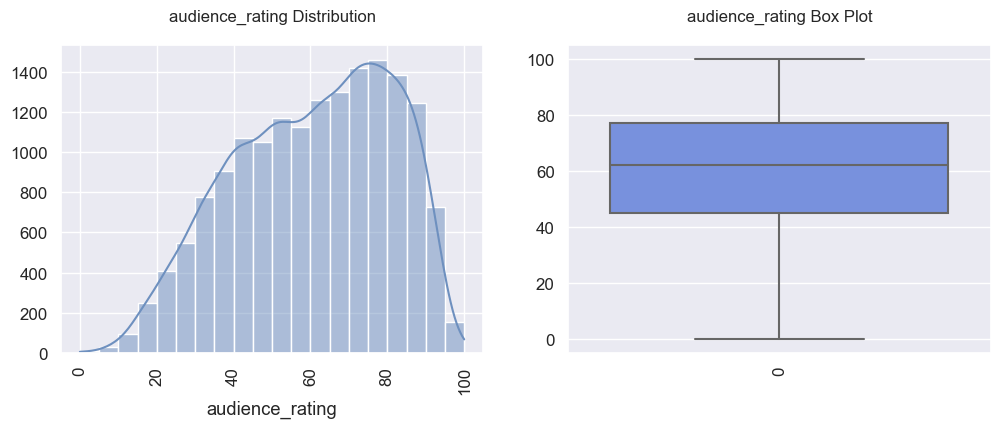

Skewness of audience_rating : -0.3069806311180837


In [235]:
#Visualize target distribution
col = 'audience_rating'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].tick_params(axis='x', rotation=90)  
axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)
axes[1].tick_params(axis='x', rotation=90)  

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'audience_rating' is skewed to the left in the hist plot

### 1.6.1.2 Independent variables

### Categorical Columns

In [236]:
categorical_col =  df.select_dtypes(include='object').columns.tolist()
print(f"Categorical Columns:\n {categorical_col}\n")

Categorical Columns:
 ['rating', 'tomatometer_status', 'mapped_genre']



We are using this method because we removed genre from the Categorical_col,instead of genre,we are using mapped_genre.

In [237]:
# List of categorical columns that look like categories
for i,col in enumerate(categorical_col):
    print(f"{i+1}. {col}:   {df[col].nunique()} unique values")

1. rating:   8 unique values
2. tomatometer_status:   3 unique values
3. mapped_genre:   9 unique values


## rating(1)

### Custom function for showing percentage in graph

In [238]:
def show_percentage(ax, total, fontsize=10):
    ''' Shows the representative percentage in each bar in a countplot.'''
    for p in ax.patches:
        percentage = f"{100 * p.get_height()/total:.1f}%"
        x = p.get_x() + p.get_width() / 2 + 0.04
        y = p.get_height()
        ax.annotate(percentage, (x , y + 80), fontsize=fontsize, ha='center')

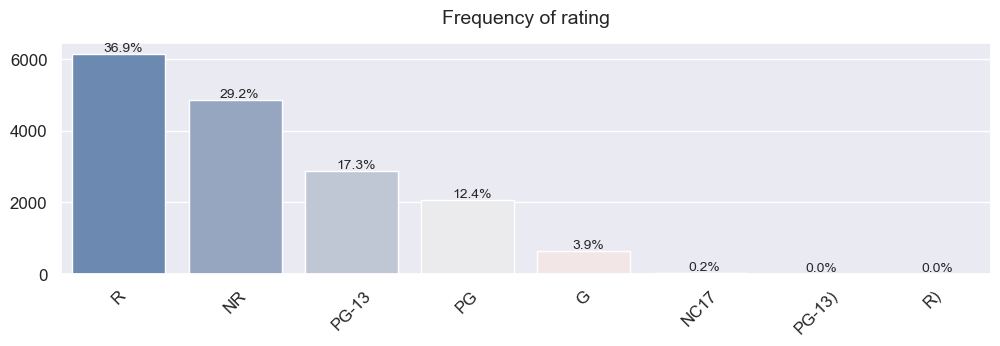

In [239]:
# Visualize the frequency of rating(1)
col = 'rating'
plt.figure(figsize=(12, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=45)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

1)The R rating is the most frequent, accounting for **36.9%** of all movies.This indicates that a significant proportion of films target mature audiences.

2)**29.2%** of movies fall under the NR (Not Rated) category.The large presence of NR movies may suggest incomplete rating information or movies not officially rated.

3)PG-13 accounts for **17.3%,** making it the third most common rating.PG follows closely with **12.4%,** showing moderate representation for family-friendly content.

4)G-rated movies **(3.9%)** indicate fewer films explicitly designed for all audiences.
NC-17, at only **0.2%**, represents the least frequent rating, highlighting minimal content for restricted audiences.

5)Irregular entries like R) and PG-13) suggest possible data inconsistencies or typographical errors that require cleaning

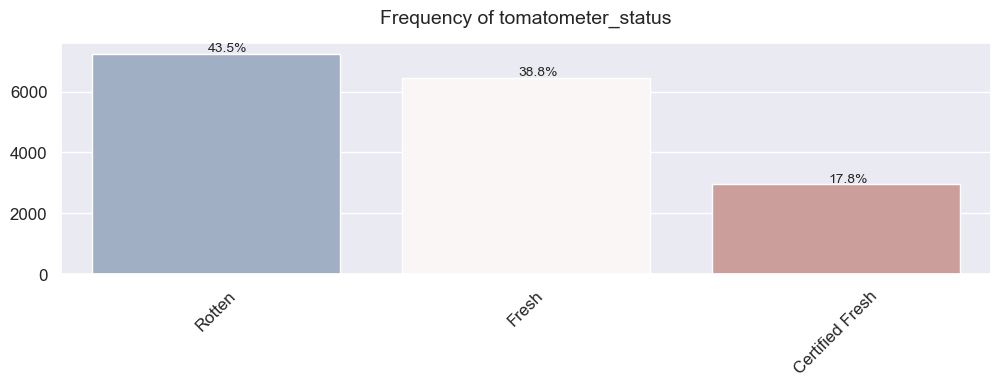

In [240]:
# Visualize the frequency of tomatometer_status(2)
col = 'tomatometer_status'
plt.figure(figsize=(12, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=45)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

**1)High Proportion of "Rotten" Movies**

43.5% of movies fall under the "Rotten" category, indicating a large portion of the movies received poor ratings.
This suggests that nearly half of the movies analyzed did not meet critical standards or audience expectations.

**2)"Fresh" Status Holds 38.8% Share**

38.8% of movies are categorized as "Fresh", signifying moderately positive critical reception.
This indicates that a substantial number of movies performed decently in terms of reviews.

**3)Certified Fresh Movies are a Minority**

Only 17.8% of movies achieve the "Certified Fresh" status.
"Certified Fresh" indicates high critical acclaim and consistent positive reviews.
This highlights that relatively few movies meet the highest quality threshold as defined by critics.

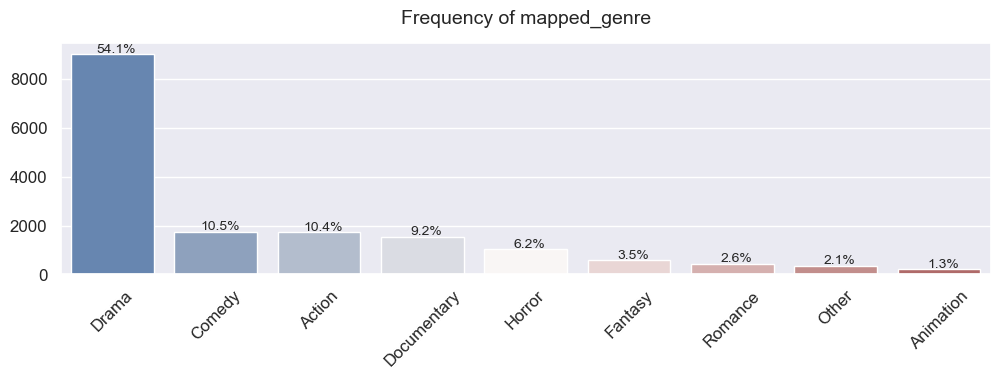

In [241]:
# Visualize the frequency of mapped_genre(3)
col = 'mapped_genre'
plt.figure(figsize=(12, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=45)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

**1)Dominance of Drama**

54.1% of movies fall under the "Drama" genre, making it the most prevalent category.
This indicates a strong preference for dramatic storytelling in the dataset, which could reflect audience demand, production trends, or critical acclaim in this genre.

**2)Comedy and Action are Secondary Genres**

Comedy (10.5%) and Action (10.4%) are the next most frequent genres, both contributing significantly to the dataset.
These genres are often associated with mainstream popularity and commercial success, appealing to wider audiences.

**3)Documentaries Hold a Moderate Share**

9.2% of movies are categorized as "Documentary", showing a notable representation of non-fiction storytelling.
This highlights a focus on informative or real-world narratives.

**4)Horror and Fantasy Genres Have Lower Representation**

Horror makes up 6.2%, while Fantasy accounts for 3.5% of movies.
Despite their popularity among niche audiences, these genres have relatively limited representation.

**5)Underrepresented Genres**

Romance (2.6%), Other (2.1%), and Animation (1.3%) are the least frequent genres in the dataset.
This could imply that either fewer movies in these categories are produced or they are underrepresented in the data collection process.


### Numerical columns

In [242]:
# List of numerical columns in the dataset
for i,col in enumerate(numerical_col):
    print(f"{i+1}. {col}")

1. runtime_in_minutes
2. tomatometer_rating
3. tomatometer_count


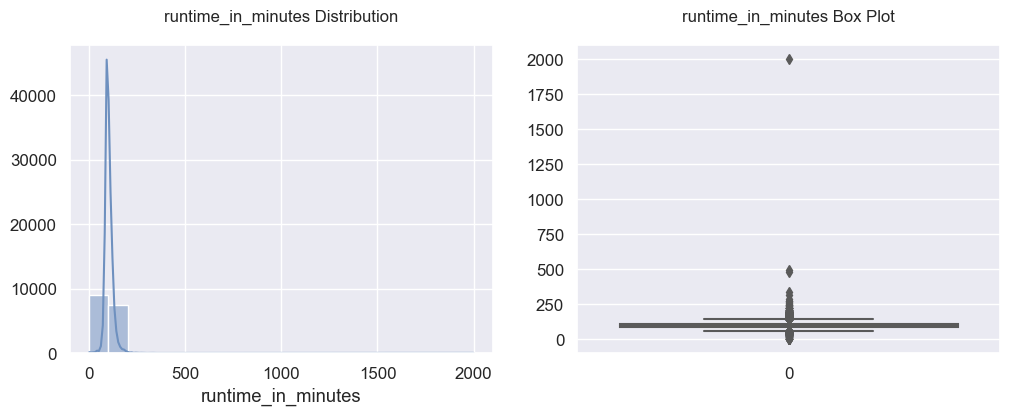

Skewness of runtime_in_minutes : 27.575915614142403


In [243]:
#Visualize (1) runtime_in_minutes
col = 'runtime_in_minutes'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.color_palette("vlag", as_cmap=True)

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#6e90bf')
sns.boxplot(df[col], ax=axes[1], color='#6e90bf')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of MinTemp
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'runtime_in_minutes' is skewed to the right. A Box plot indicates the presence of outliers in this variable.

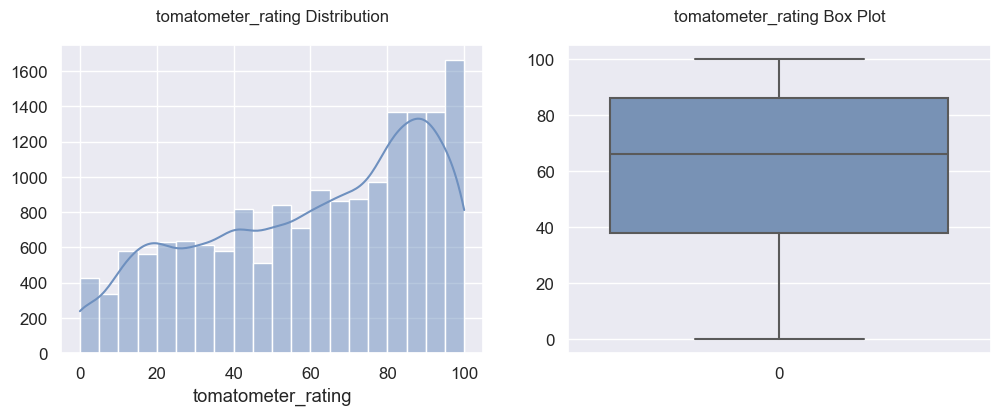

Skewness of tomatometer_rating : -0.41937692761423645


In [244]:
#Visualize (2) tomatometer_rating
col = 'tomatometer_rating'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.color_palette("vlag", as_cmap=True)

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#6e90bf')
sns.boxplot(df[col], ax=axes[1], color='#6e90bf')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of MinTemp
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'tomatometer_rating ' is skewed to the left.

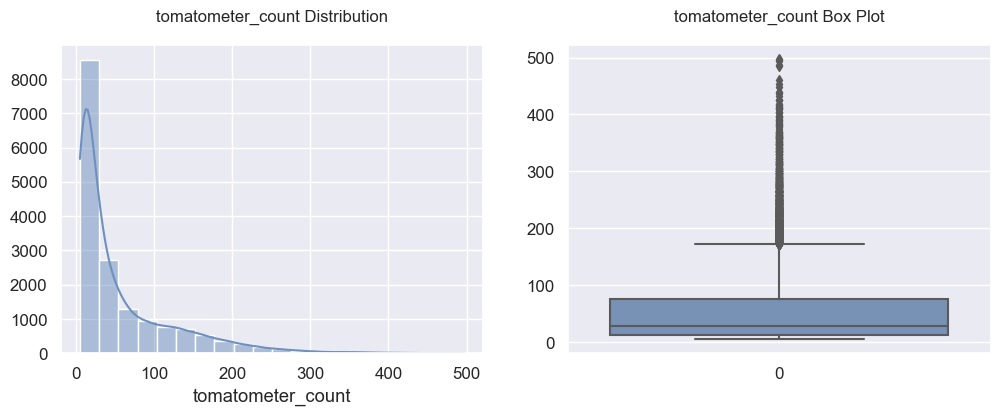

Skewness of tomatometer_count : 2.010217471148343


In [245]:
#Visualize (3) tomatometer_count
col = 'tomatometer_count'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.color_palette("vlag", as_cmap=True)

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#6e90bf')
sns.boxplot(df[col], ax=axes[1], color='#6e90bf')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of MinTemp
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'tomatometer_count ' is skewed to the right. A Box plot indicates the presence of outliers in this variable.

### Datetime Columns

In [246]:
# List of datetime columns in the dataset
for i,col in enumerate(datetime_col):
    print(f"{i+1}. {col}")

1. in_theaters_date
2. on_streaming_date


### in_theaters_date(1)

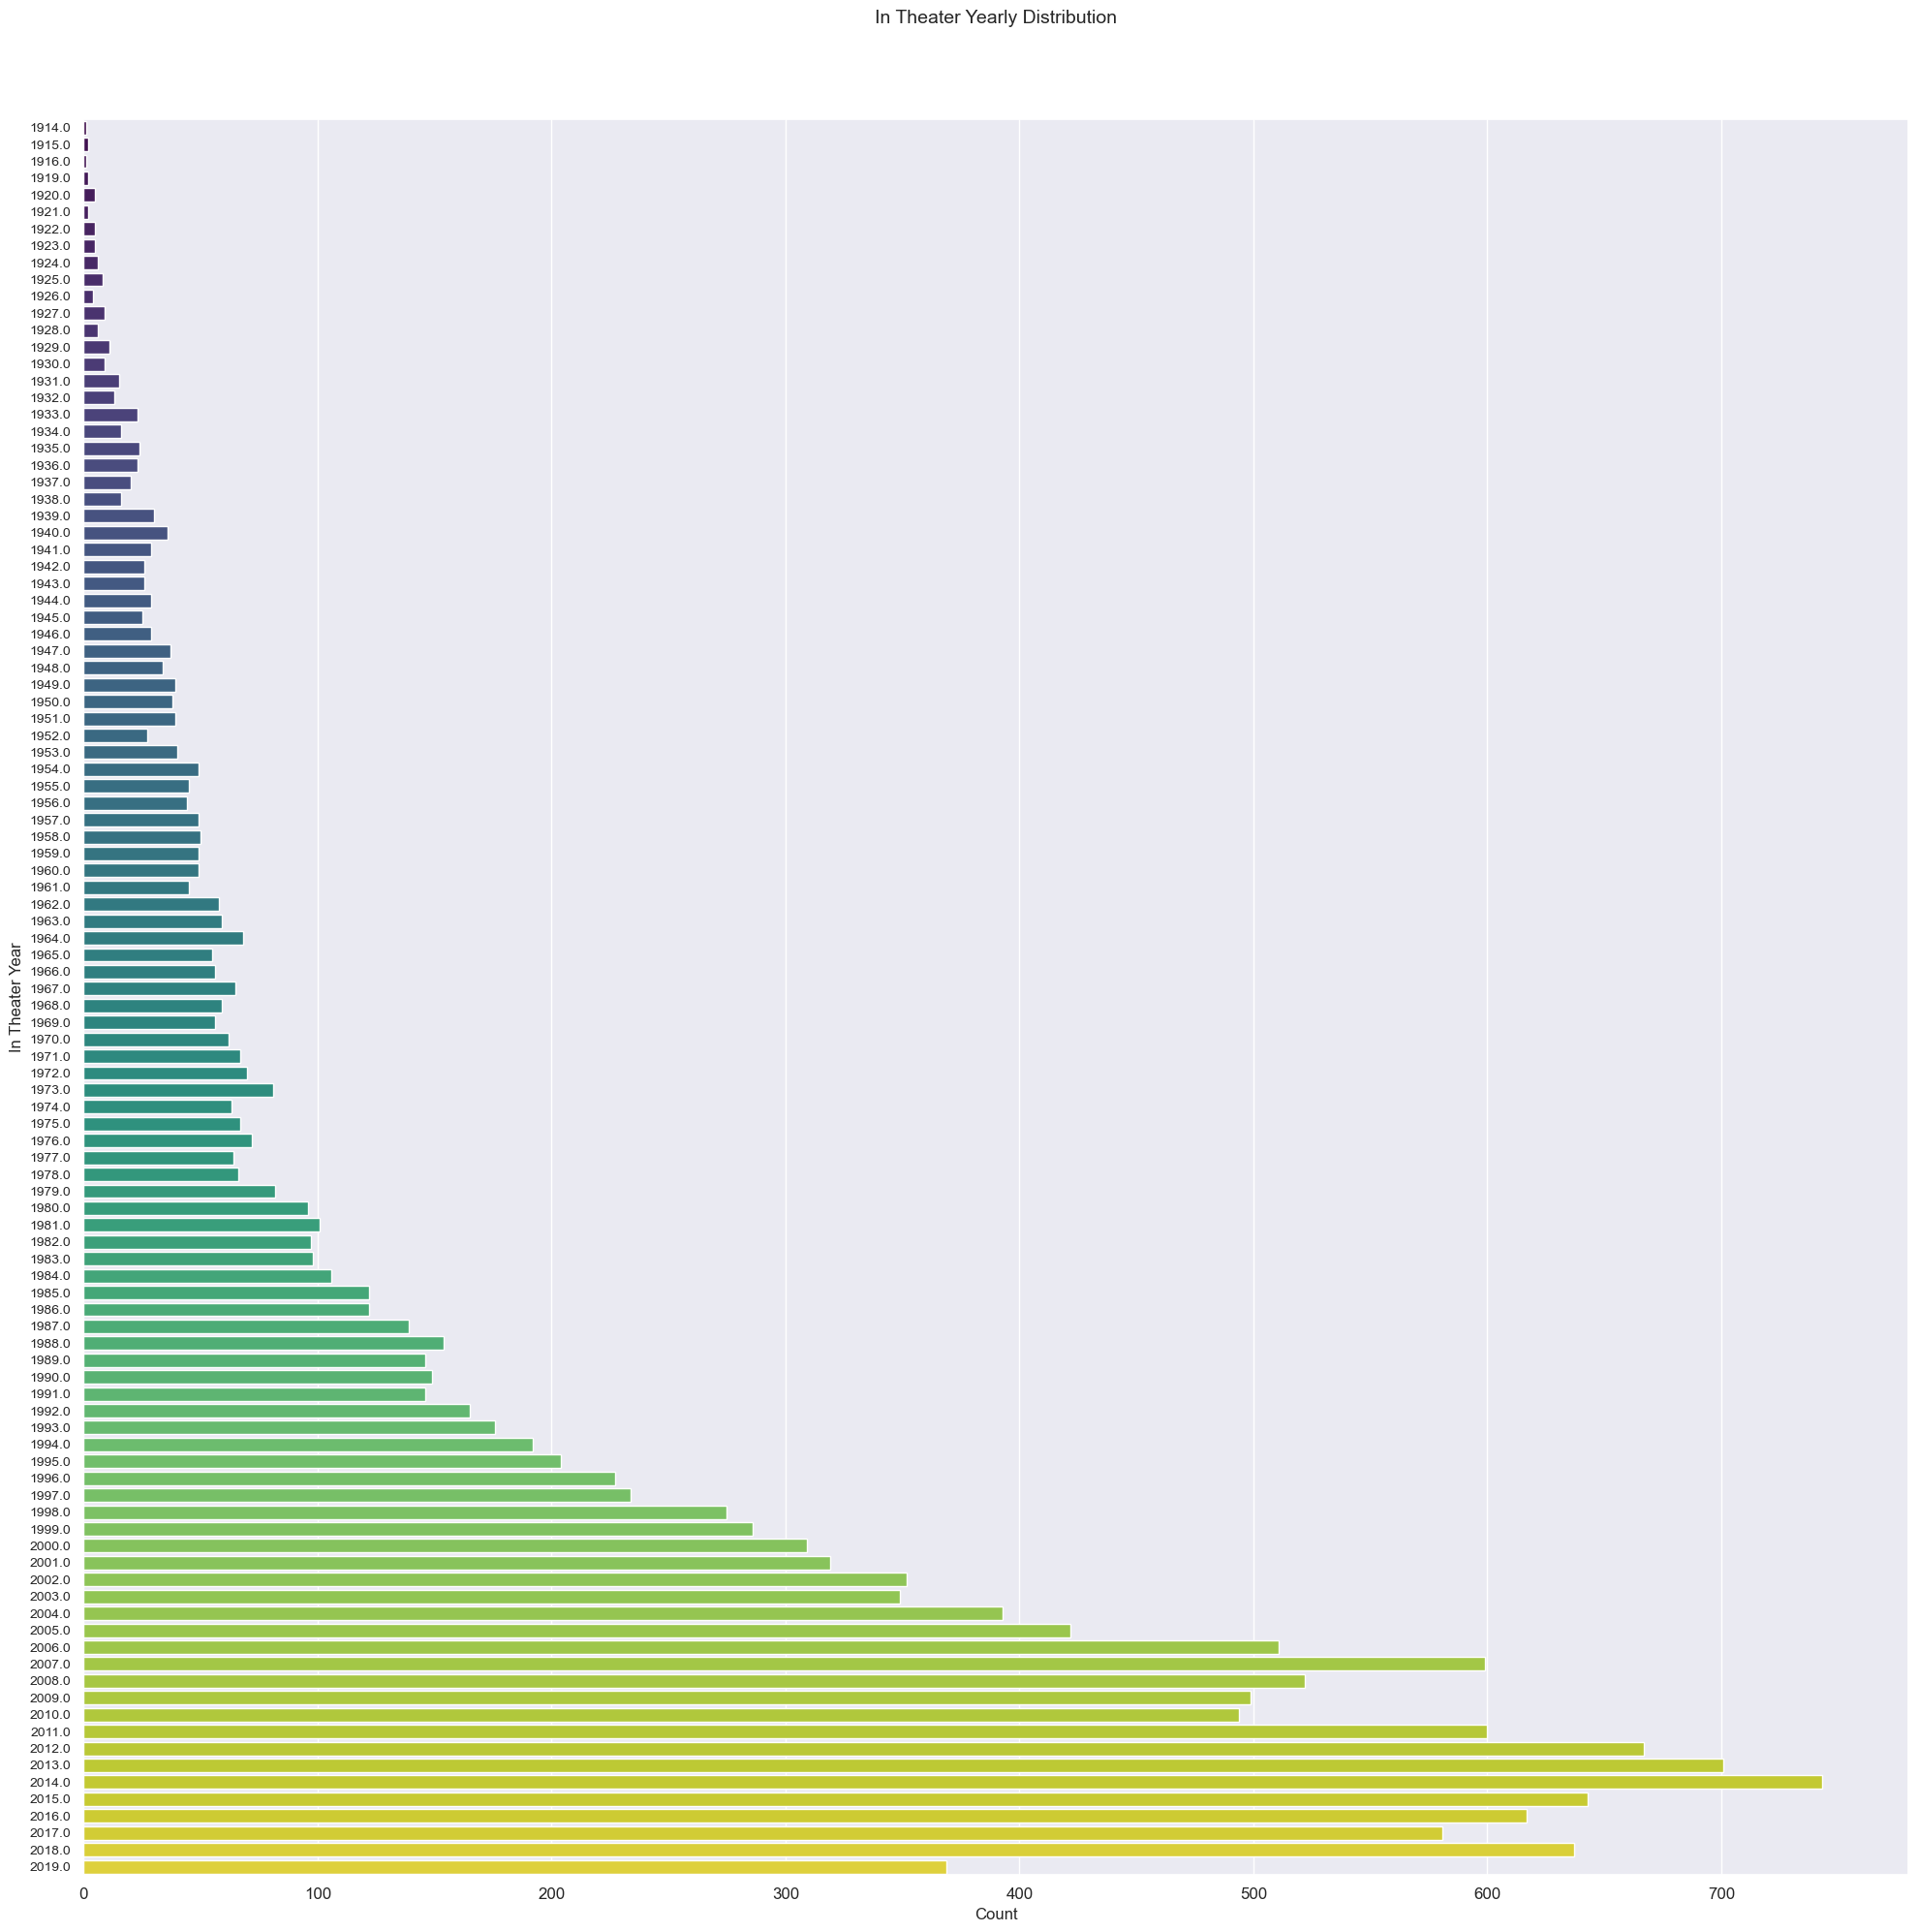

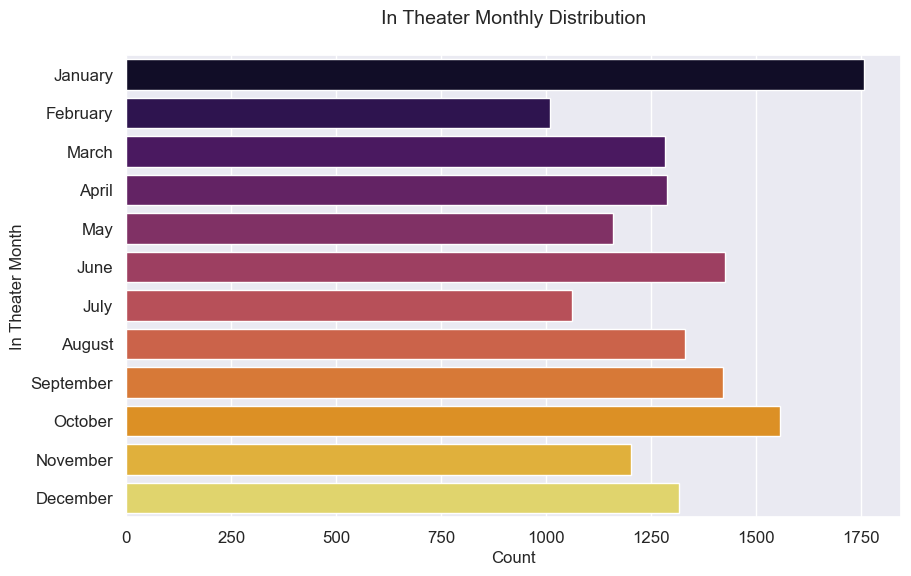

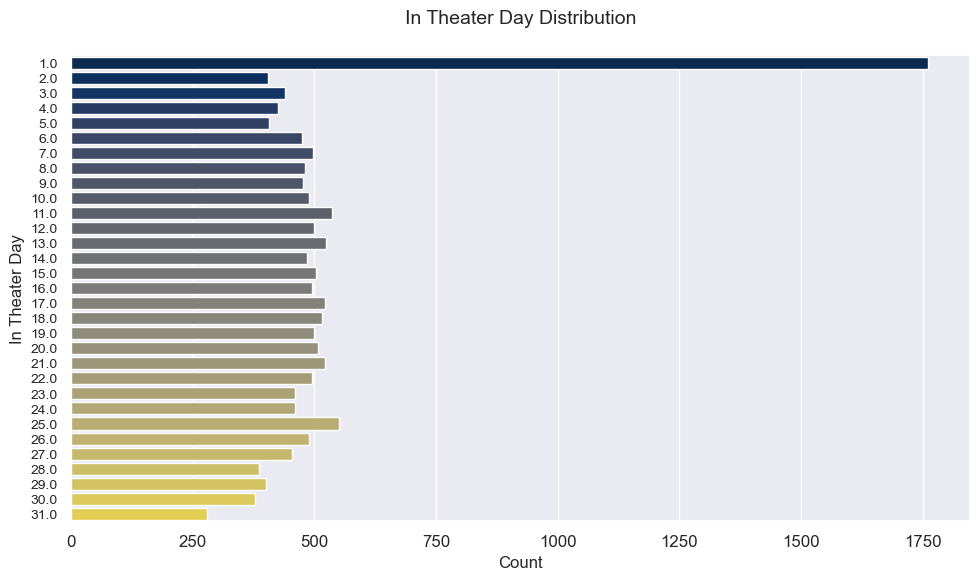

Minimum Release Date: 1914-06-01 00:00:00
Maximum Release Date: 2019-12-07 00:00:00

Descriptive Statistics for Release Date:
count                            15822
mean     1999-10-24 12:27:23.686006784
min                1914-06-01 00:00:00
25%                1993-03-27 12:00:00
50%                2006-08-04 00:00:00
75%                2013-06-28 00:00:00
max                2019-12-07 00:00:00
Name: in_theaters_date, dtype: object


In [247]:
# Extract Year, Month, Day
df['in_theater_Year'] = pd.to_datetime(df['in_theaters_date']).dt.year
df['in_theater_Month'] = pd.to_datetime(df['in_theaters_date']).dt.month_name()
df['in_theater_Day'] = pd.to_datetime(df['in_theaters_date']).dt.day

# Calculate descriptive statistics for dates (optional)
date_stats = df['in_theaters_date'].describe(percentiles=[.25, .5, .75])

# ---- Yearly Distribution ----
plt.figure(figsize=(20, 20))  # Increased figure size
sns.countplot(y='in_theater_Year', data=df, palette='viridis')  # Horizontal bar chart
plt.title("In Theater Yearly Distribution", size=14, y=1.05)
plt.ylabel("In Theater Year", size=12)
plt.xlabel("Count", size=12)
plt.yticks(fontsize=10)  # Adjust year label font size
plt.tight_layout()  # Ensures proper spacing
plt.show()

# ---- Monthly Distribution ----
plt.figure(figsize=(10, 6))  # Set individual figure size
sns.countplot(y='in_theater_Month', data=df, palette='inferno', order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])  # Ensures month order
plt.title("In Theater Monthly Distribution", size=14, y=1.05)
plt.ylabel("In Theater Month", size=12)
plt.xlabel("Count", size=12)
plt.show()

# ---- Daily Distribution ----
plt.figure(figsize=(10, 6))  # Set figure size for day distribution
sns.countplot(y='in_theater_Day', data=df, palette='cividis')  # Horizontal bar chart for day distribution
plt.title("In Theater Day Distribution", size=14, y=1.05)
plt.ylabel("In Theater Day", size=12)
plt.xlabel("Count", size=12)
plt.yticks(fontsize=10)  # Adjust day label font size
plt.tight_layout()  # Ensures proper spacing
plt.show()

# Additional insights (optional)
print(f"Minimum Release Date: {df['in_theaters_date'].min()}")
print(f"Maximum Release Date: {df['in_theaters_date'].max()}")

# Display descriptive statistics if calculated (optional)
print("\nDescriptive Statistics for Release Date:")
print(date_stats)


**In Theater Yearly Distribution**

1)The year **2014** had the **highest number of movie releases**, indicating a peak in production and theater activity during that time.

2)This could reflect industry trends such as increased demand, higher production capacity, or a favorable market for theatrical releases.

**In Theater Monthly Distribution**

1)**January** is the month with the highest number of theater releases, indicating that studios may target this period to attract audiences after the holiday season.

2)**February,** on the other hand, has the least number of releases, suggesting it is a less popular month for movie launches, possibly due to lower audience engagement during this time.


**In Theater Date Distribution**

The distribution of movie releases by day of the month reveals that **Day 1 consistently sees the highest number of movie releases, while Day 31 has the lowest number.** This pattern could suggest that movies are more frequently released at the start of the month, possibly to coincide with marketing strategies, opening weekends, or other industry scheduling trends

In [248]:
df

,rating,in_theaters_date,on_streaming_date,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,mapped_genre,in_theater_Year,in_theater_Month,in_theater_Day
0,PG,2010-02-12,2010-06-29,83.0,Rotten,49,144,53.0,Drama,2010.0,February,12.0
1,R,2010-04-30,2010-10-19,90.0,Certified Fresh,86,140,64.0,Comedy,2010.0,April,30.0
2,R,1979-10-05,1997-08-27,118.0,Fresh,68,22,53.0,Romance,1979.0,October,5.0
3,NR,1957-04-13,2001-03-06,95.0,Certified Fresh,100,51,97.0,Drama,1957.0,April,13.0
4,G,1954-01-01,2003-05-20,127.0,Fresh,89,27,74.0,Drama,1954.0,January,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16633,R,1981-10-02,2003-05-27,104.0,Rotten,56,9,74.0,Drama,1981.0,October,2.0
16634,PG,2016-03-04,2016-06-07,108.0,Certified Fresh,97,279,92.0,Action,2016.0,March,4.0
16635,NR,1964-12-17,2004-08-03,142.0,Fresh,78,9,87.0,Drama,1964.0,December,17.0
16636,PG,1964-06-17,2001-02-02,139.0,Fresh,95,21,91.0,Drama,1964.0,June,17.0


In [249]:
# Remove the 'in_theaters_date' column
df = df.drop(columns=['in_theaters_date'])

# Verify if the column is removed
df.head()


,rating,on_streaming_date,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,mapped_genre,in_theater_Year,in_theater_Month,in_theater_Day
0,PG,2010-06-29,83.0,Rotten,49,144,53.0,Drama,2010.0,February,12.0
1,R,2010-10-19,90.0,Certified Fresh,86,140,64.0,Comedy,2010.0,April,30.0
2,R,1997-08-27,118.0,Fresh,68,22,53.0,Romance,1979.0,October,5.0
3,NR,2001-03-06,95.0,Certified Fresh,100,51,97.0,Drama,1957.0,April,13.0
4,G,2003-05-20,127.0,Fresh,89,27,74.0,Drama,1954.0,January,1.0


This will drop the in_theaters_date column, as we now have the respective in_theater_Year, in_theater_Month, and in_theater_Day columns



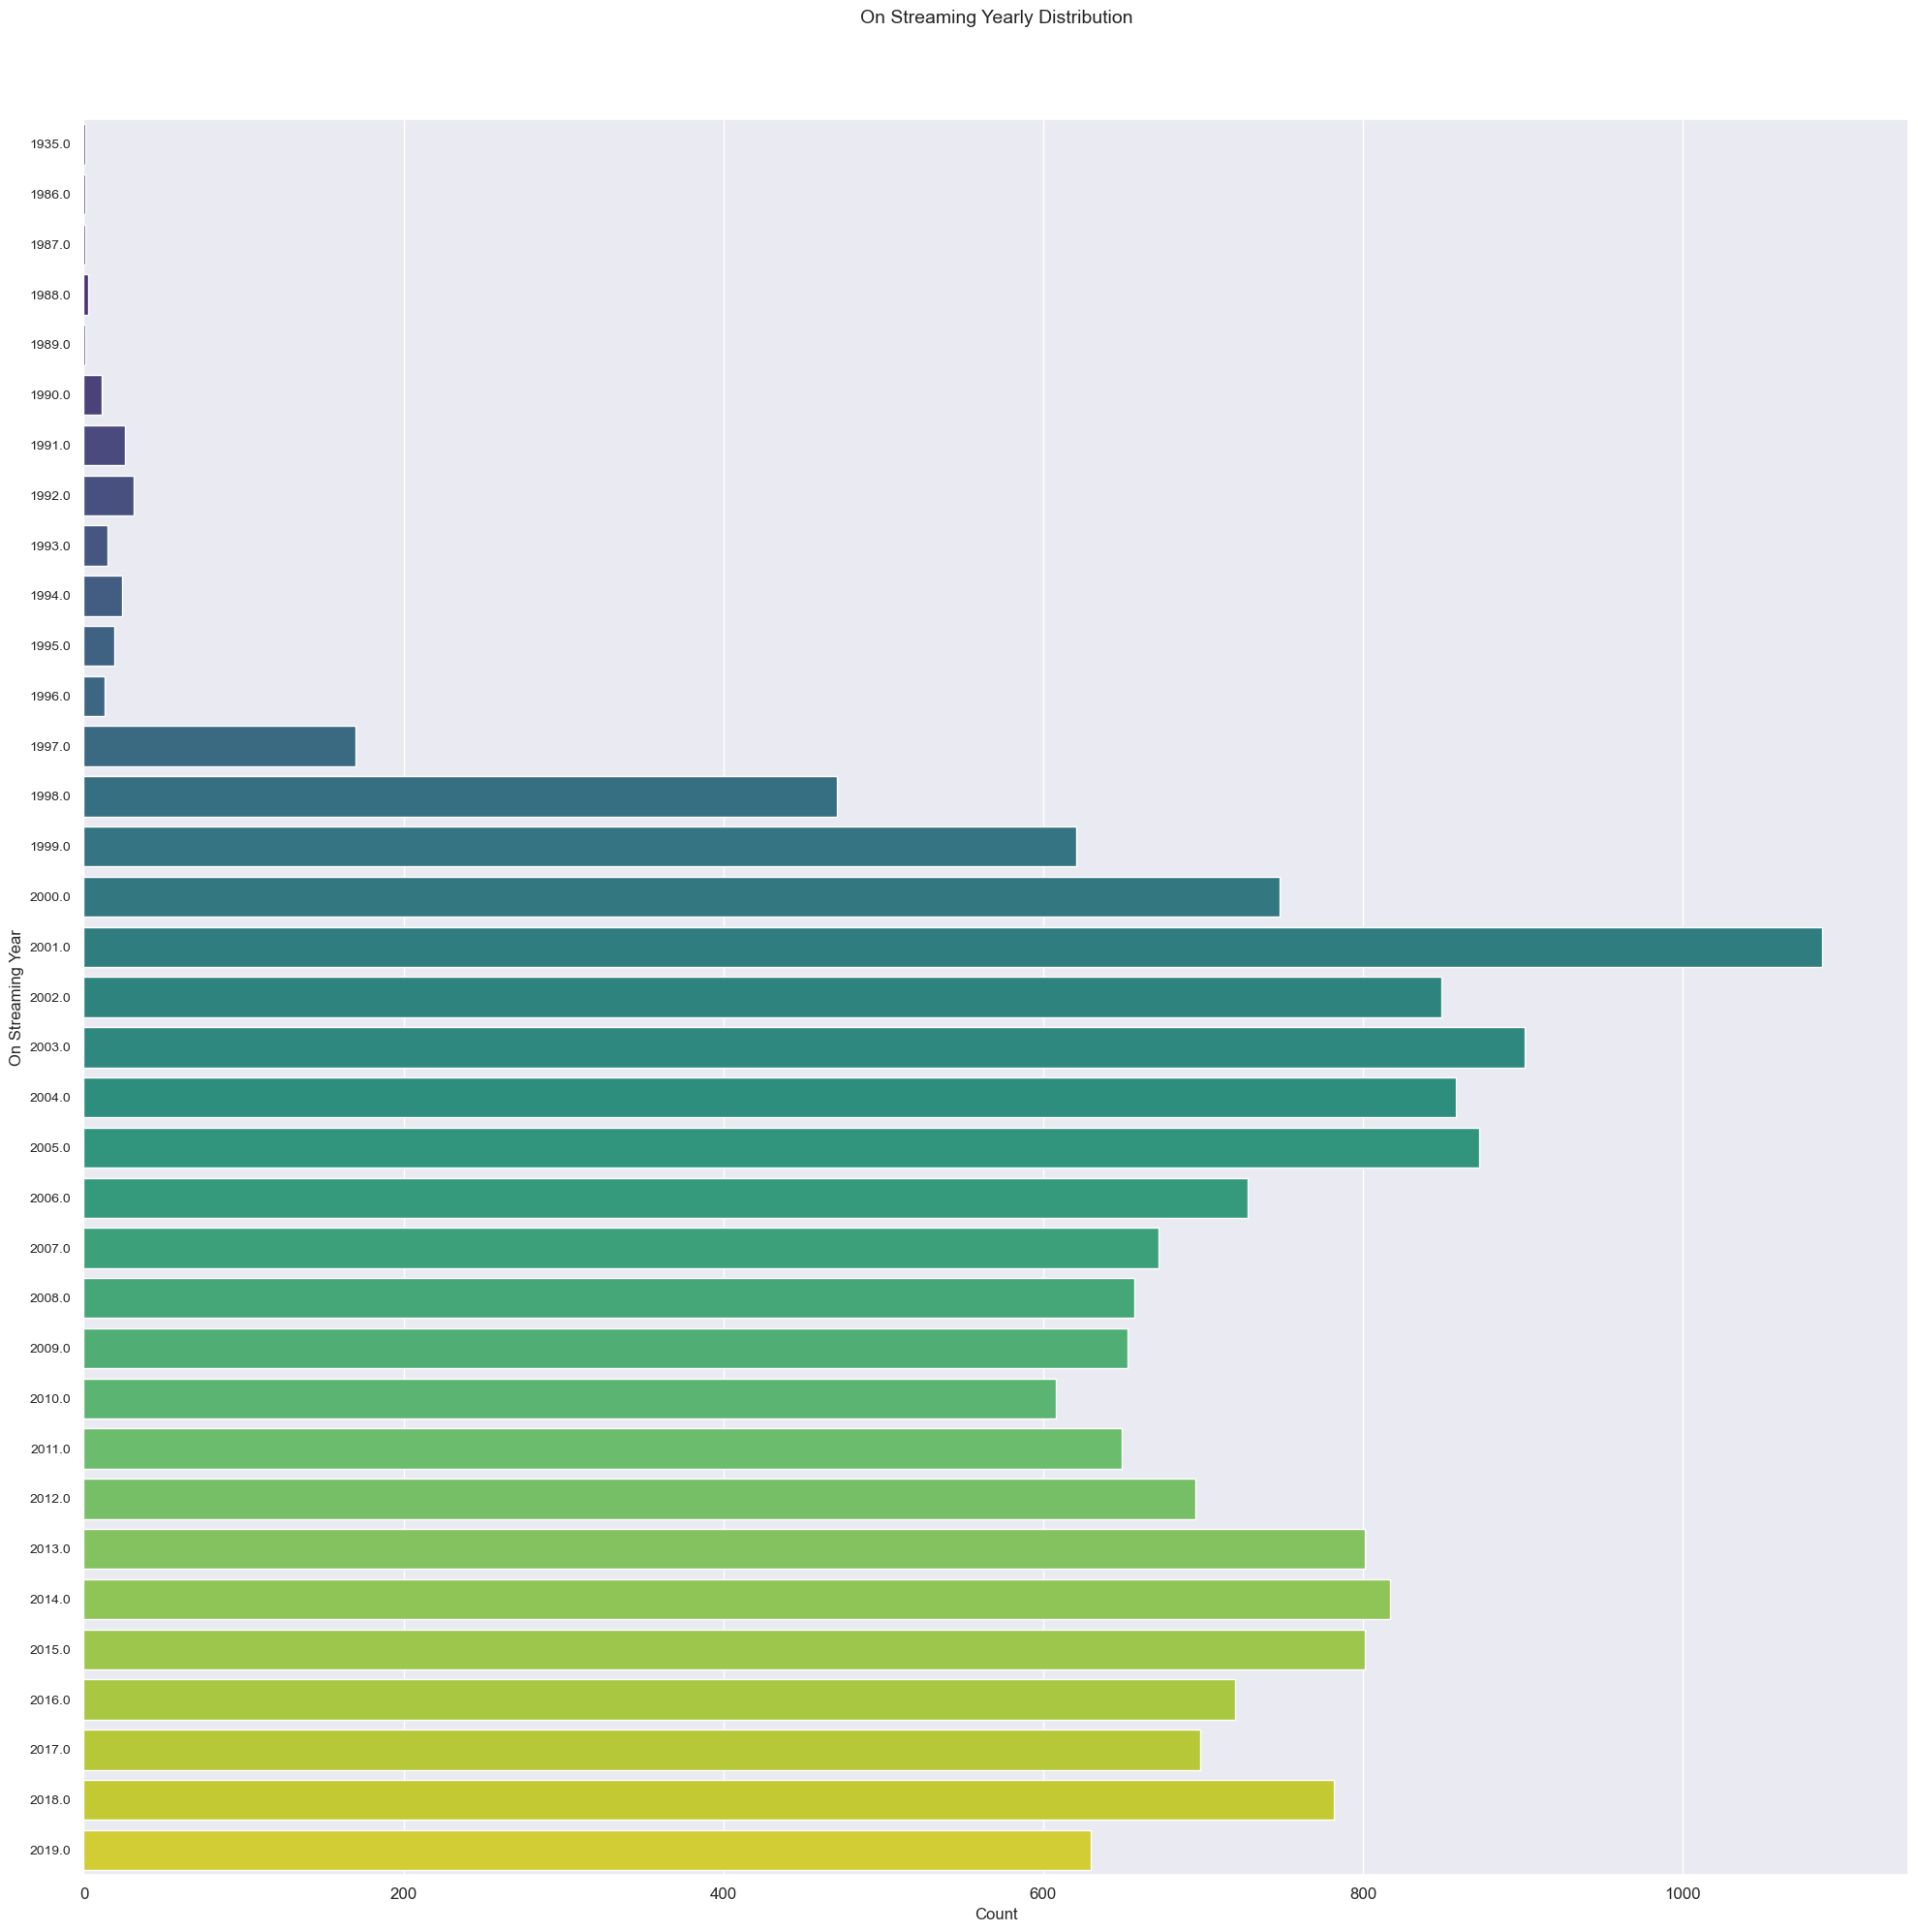

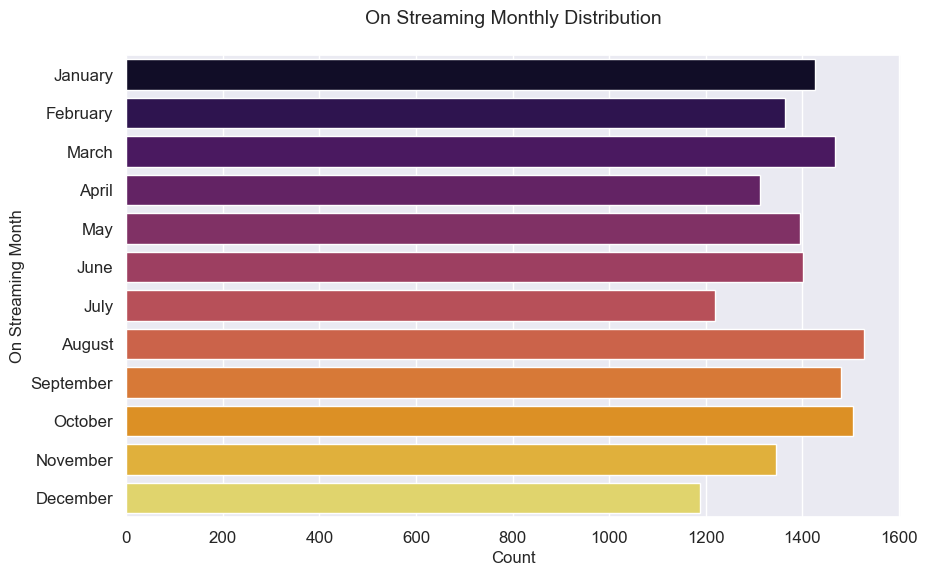

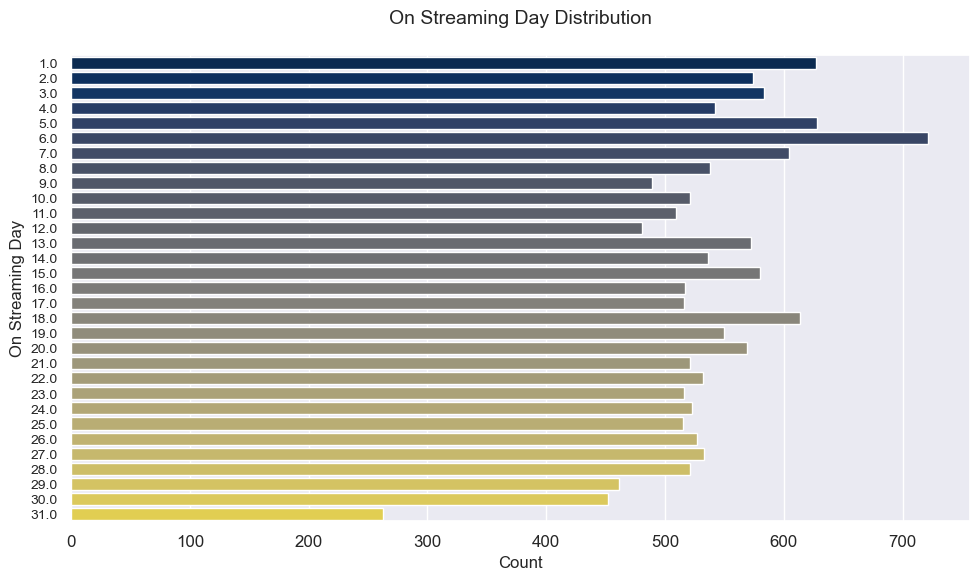

Minimum Streaming Date: 1935-06-06 00:00:00
Maximum Streaming Date: 2019-11-01 00:00:00

Descriptive Statistics for Streaming Date:
count                            16635
mean     2008-08-13 08:55:24.075743744
min                1935-06-06 00:00:00
25%                2003-01-28 00:00:00
50%                2008-04-08 00:00:00
75%                2014-05-12 00:00:00
max                2019-11-01 00:00:00
Name: on_streaming_date, dtype: object


In [250]:
# Extract Year, Month, Day from 'on_streaming_date'
df['on_streaming_Year'] = pd.to_datetime(df['on_streaming_date']).dt.year
df['on_streaming_Month'] = pd.to_datetime(df['on_streaming_date']).dt.month_name()
df['on_streaming_Day'] = pd.to_datetime(df['on_streaming_date']).dt.day

# Calculate descriptive statistics for 'on_streaming_date' (optional)
streaming_date_stats = df['on_streaming_date'].describe(percentiles=[.25, .5, .75])

# ---- Yearly Distribution ----
plt.figure(figsize=(20, 20))  # Increased figure size
sns.countplot(y='on_streaming_Year', data=df, palette='viridis')  # Horizontal bar chart
plt.title("On Streaming Yearly Distribution", size=14, y=1.05)
plt.ylabel("On Streaming Year", size=12)
plt.xlabel("Count", size=12)
plt.yticks(fontsize=10)  # Adjust year label font size
plt.tight_layout()  # Ensures proper spacing
plt.show()

# ---- Monthly Distribution ----
plt.figure(figsize=(10, 6))  # Set individual figure size
sns.countplot(y='on_streaming_Month', data=df, palette='inferno', order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])  # Ensures month order
plt.title("On Streaming Monthly Distribution", size=14, y=1.05)
plt.ylabel("On Streaming Month", size=12)
plt.xlabel("Count", size=12)
plt.show()

# ---- Daily Distribution ----
plt.figure(figsize=(10, 6))  # Set figure size for day distribution
sns.countplot(y='on_streaming_Day', data=df, palette='cividis')  # Horizontal bar chart for day distribution
plt.title("On Streaming Day Distribution", size=14, y=1.05)
plt.ylabel("On Streaming Day", size=12)
plt.xlabel("Count", size=12)
plt.yticks(fontsize=10)  # Adjust day label font size
plt.tight_layout()  # Ensures proper spacing
plt.show()

# Additional insights (optional)
print(f"Minimum Streaming Date: {df['on_streaming_date'].min()}")
print(f"Maximum Streaming Date: {df['on_streaming_date'].max()}")

# Display descriptive statistics if calculated (optional)
print("\nDescriptive Statistics for Streaming Date:")
print(streaming_date_stats)


**On Streaming Yearly Distribution**

In **2001, the highest number of streaming releases occurred**, possibly due to the growth of streaming services, increased digital content availability, and the release of popular titles. This year marked a significant point in the evolution of content distribution on streaming platforms.


**On Streaming Monthly Distribution**

1.**August sees the highest number of streaming releases**, likely due to increased content availability and higher viewer engagement during the summer months.
  
2.**December has the lowest number of releases**, possibly because studios focus on other strategies for the holiday season, such as theatrical releases or holiday specials.

**On Streaming Daily Distribution**

1.**6th is the highest date for streaming releases**, likely due to strategic scheduling around early-month release windows to maximize audience engagement.

2.**31st is the lowest date**, possibly because it's the final day of the month, with fewer releases due to scheduling constraints or month-end planning.

In [251]:
# Remove the 'on_streaming_date' column
df = df.drop(columns=['on_streaming_date'])

# Verify if the column is removed
df.head()

,rating,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,mapped_genre,in_theater_Year,in_theater_Month,in_theater_Day,on_streaming_Year,on_streaming_Month,on_streaming_Day
0,PG,83.0,Rotten,49,144,53.0,Drama,2010.0,February,12.0,2010.0,June,29.0
1,R,90.0,Certified Fresh,86,140,64.0,Comedy,2010.0,April,30.0,2010.0,October,19.0
2,R,118.0,Fresh,68,22,53.0,Romance,1979.0,October,5.0,1997.0,August,27.0
3,NR,95.0,Certified Fresh,100,51,97.0,Drama,1957.0,April,13.0,2001.0,March,6.0
4,G,127.0,Fresh,89,27,74.0,Drama,1954.0,January,1.0,2003.0,May,20.0


This will drop the on_streaming_date column, as we now have the respective on_streaming_Year, on_streaming_Month, and on_streaming_Day columns


In [252]:
# Remove the specified columns
df = df.drop(columns=['in_theater_Year', 'in_theater_Month', 'in_theater_Day', 
                      'on_streaming_Year', 'on_streaming_Month', 'on_streaming_Day'])

# Verify if the columns are removed
df.head()

,rating,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,mapped_genre
0,PG,83.0,Rotten,49,144,53.0,Drama
1,R,90.0,Certified Fresh,86,140,64.0,Comedy
2,R,118.0,Fresh,68,22,53.0,Romance
3,NR,95.0,Certified Fresh,100,51,97.0,Drama
4,G,127.0,Fresh,89,27,74.0,Drama


I have removed the columns `in_theater_Year`, `in_theater_Month`, `in_theater_Day`, `on_streaming_Year`, `on_streaming_Month`, and `on_streaming_Day` because, after experimenting with them, I found that removing these columns improved the model's accuracy. It appears that these features may not have added significant value to the predictive performance and their removal helped the model focus on more relevant information.

### 1.6.1.3 Univariate Boxplot

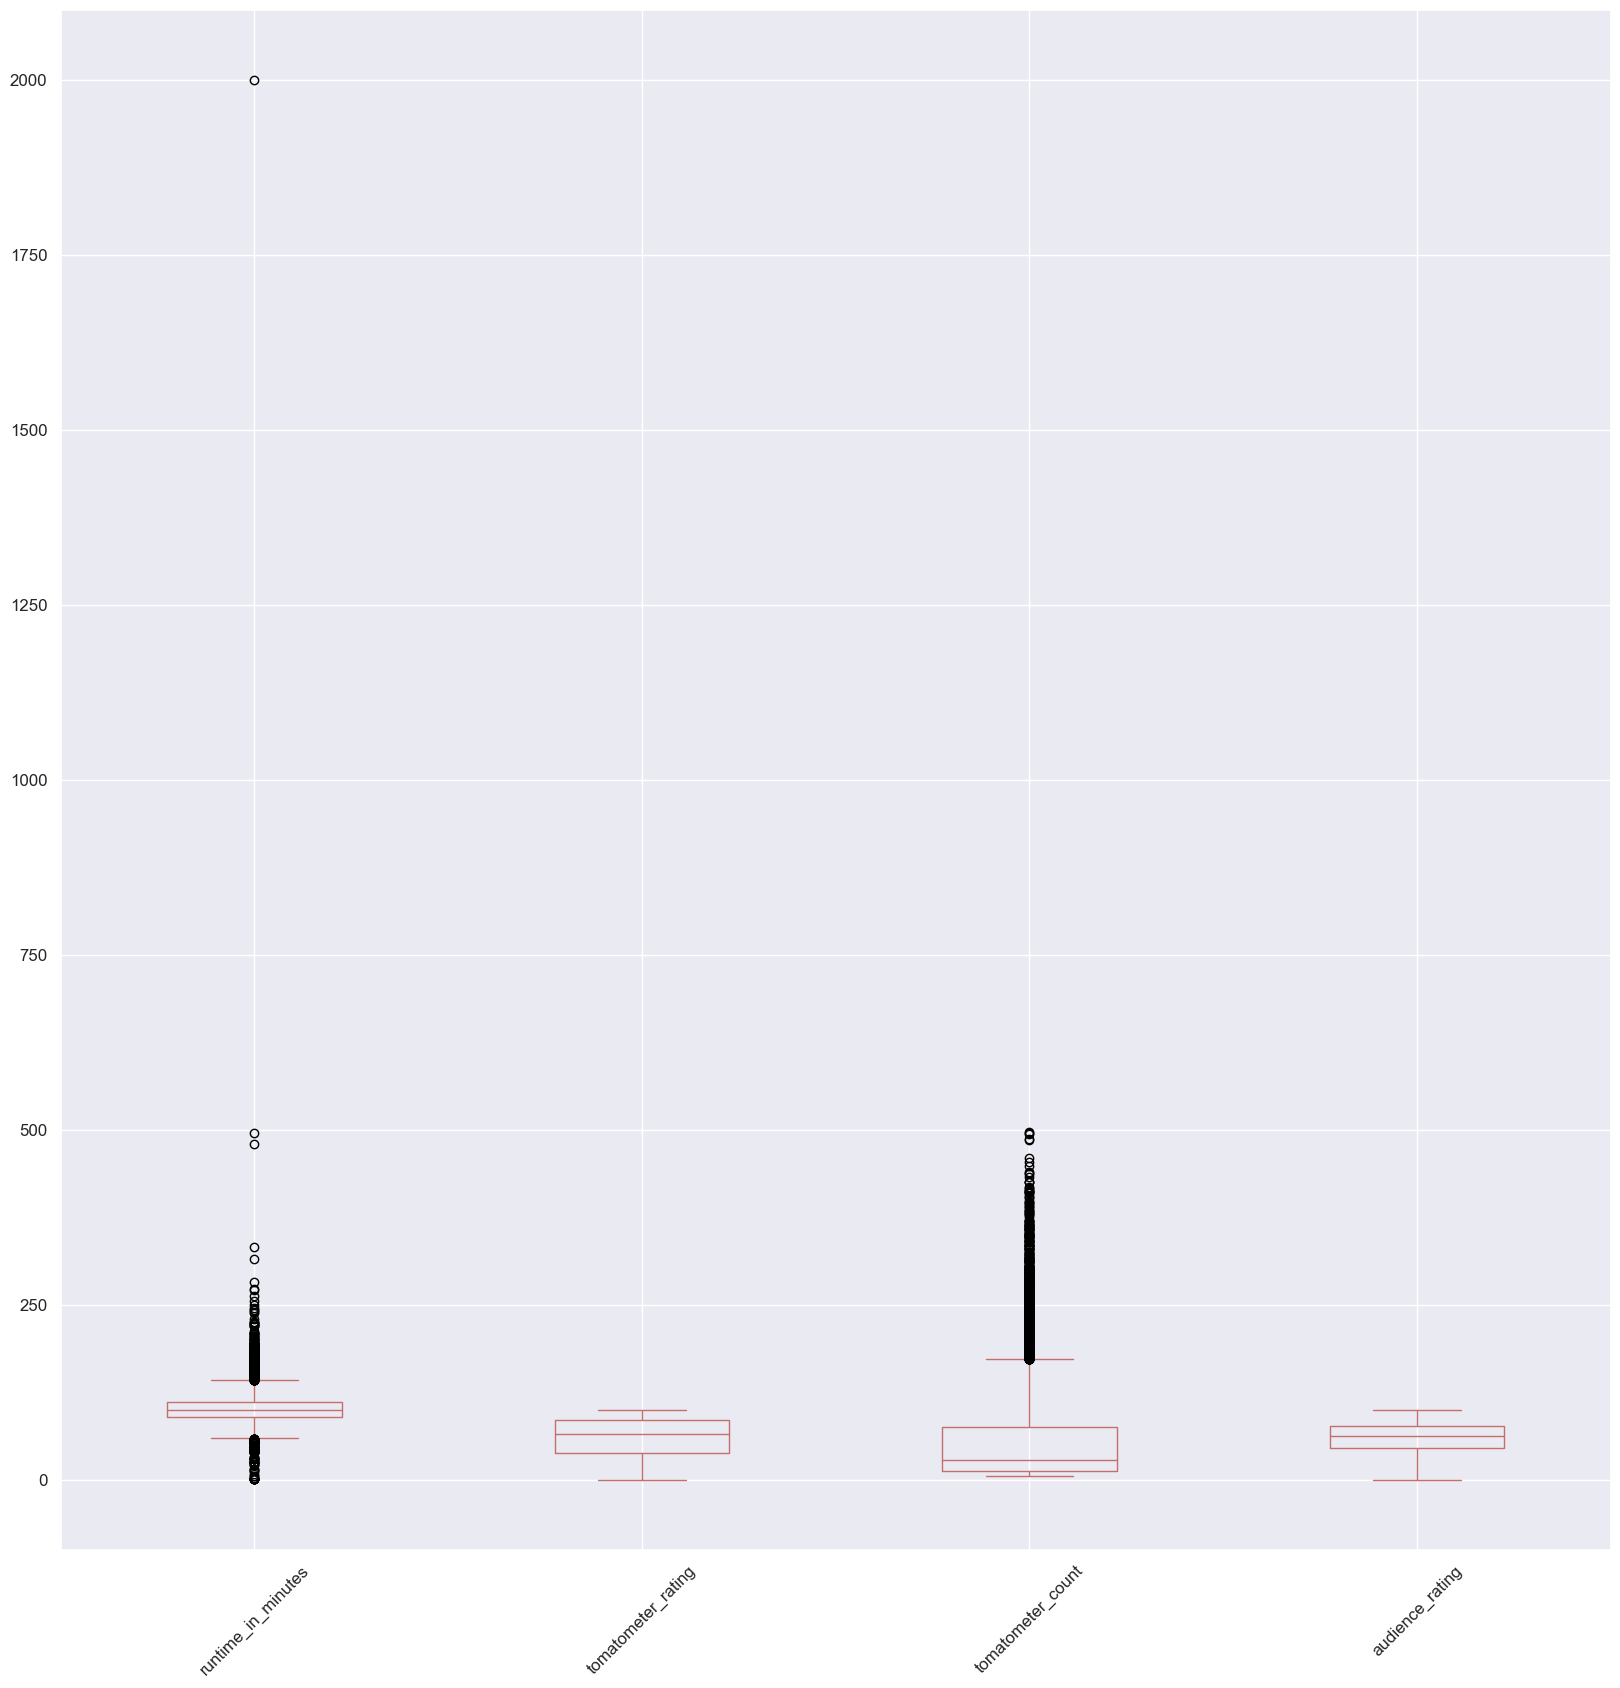

In [253]:
# Draw a boxplot for each independent variable 
df.boxplot(figsize=(20,20), color='#c26f6d')
plt.xticks(rotation=45)
plt.show()

The data is in different scales therefore it will be scaled later in the analysis.

### 1.6.2 Bivariate Analysis

### 1.6.2.1 BoxPlot Analysis: Finding outliers and comparing

### Plotting functions

In [262]:
def boxplot_by_category(col, category_col, xlabel, cat_label, figsize, palette, xscale=''):
    plt.figure(figsize=figsize)
    sns.set_palette(palette)
    sns.boxplot(data=df, x=col, y=category_col)
    plt.ylabel(cat_label)
    plt.xlabel(xlabel)
    if xscale != '':
        plt.xscale(xscale)
    plt.title(f"BoxPlot of {col} vs. {cat_label}")
    plt.show()

In [263]:
def plot_scatter_target_r_according_to(col, category_col, xlabel, title, palette):
    '''Draw a scatter plot comparing <col> with Independent variable and audience_rating.'''
    plt.figure(figsize=(8, 4))
    sns.set(font_scale=1)  

    # Plot scatterplot
    sns.scatterplot(x=col, y='audience_rating', hue=category_col, data=df, palette=palette)

    # visual presentation
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1)).set_title(category_col)
    plt.xlabel(xlabel)
    plt.ylabel('audience_rating')
    plt.title(f'{title} vs. audience_rating according to {category_col}')
    plt.show()

### audience_rating distribution according to rating

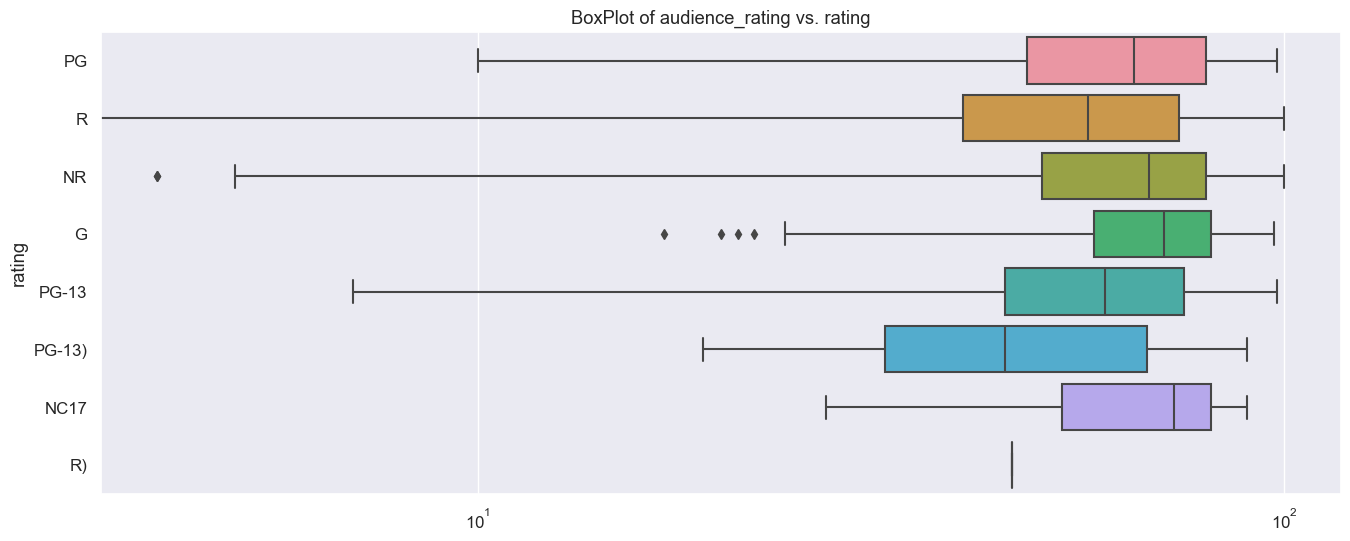

In [264]:
# Visualizing and comparing each independent variable with target
# Columns audience_rating  and 'rating'
col = 'audience_rating'
category_col= 'rating'

boxplot_by_category(col, category_col,  xlabel='', cat_label=category_col, figsize=(16,6), palette='coolwarm', xscale='log')

### audience_rating distribution according to tomatometer_status

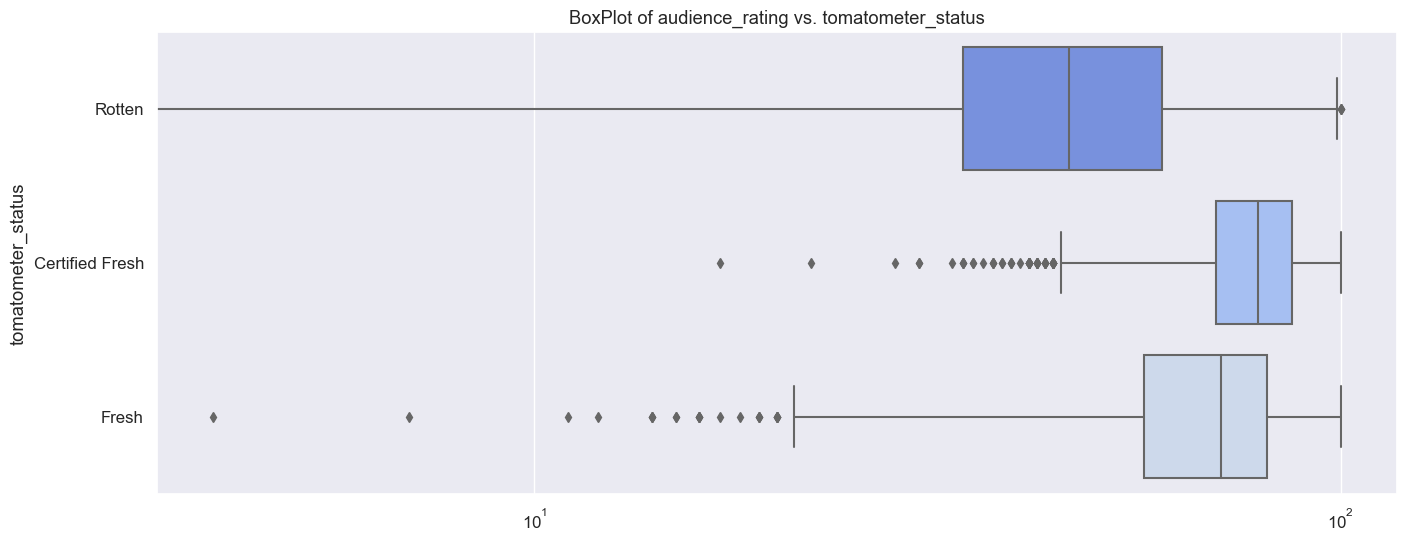

In [266]:
# Visualizing and comparing each independent variable with target
# Columns audience_rating and 'tomatometer_status'
col = 'audience_rating'
category_col= 'tomatometer_status'

boxplot_by_category(col, category_col,  xlabel='', cat_label=category_col, figsize=(16,6), palette='coolwarm', xscale='log')

### audience_rating distribution according to mapped_genre

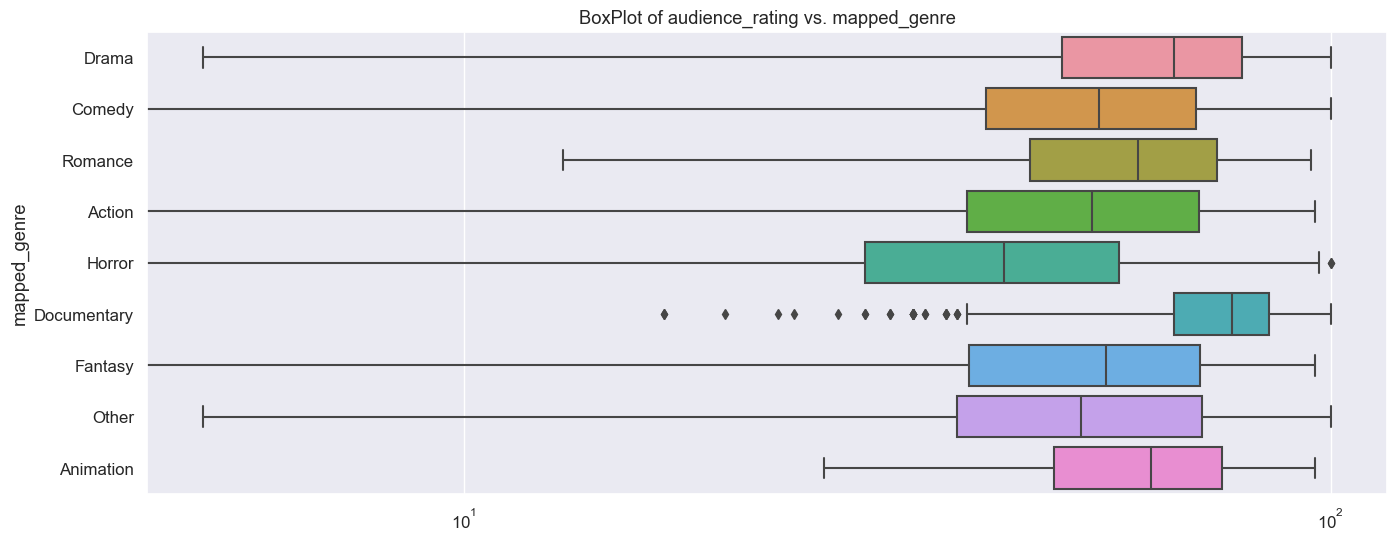

In [267]:
# Visualizing and comparing each independent variable with target
# Columns audience_rating and mapped_genre
col = 'audience_rating'
category_col= 'mapped_genre'

boxplot_by_category(col, category_col,  xlabel='', cat_label=category_col, figsize=(16,6), palette='coolwarm', xscale='log')

### Audience rating according to the rating and tomatometer_status

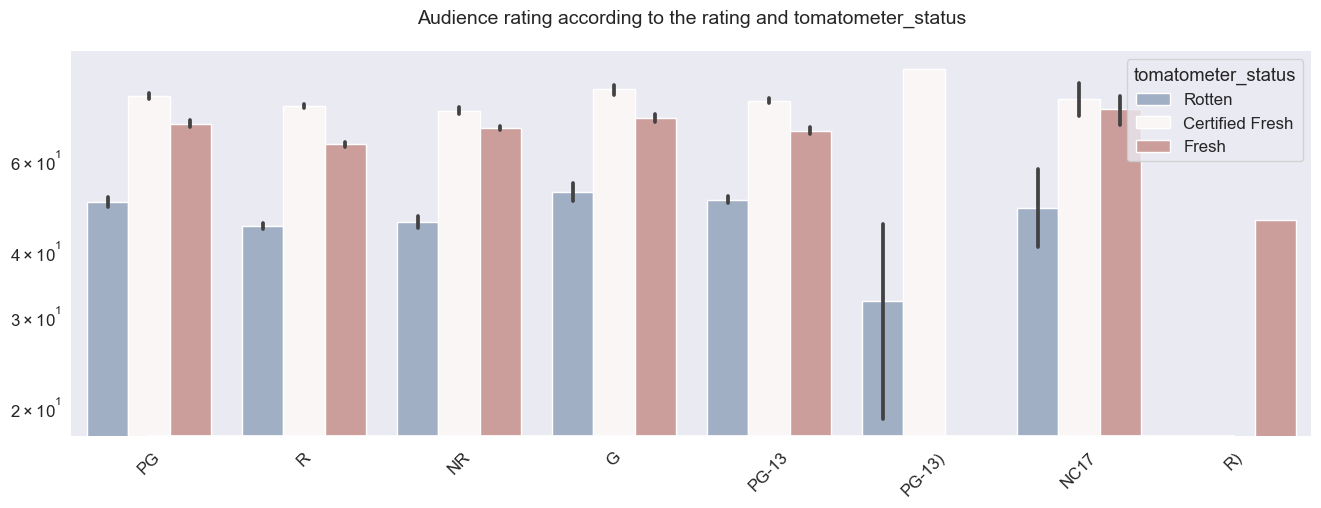

In [269]:
plt.figure(figsize=(16,5))
sns.barplot(x='rating', y='audience_rating', hue='tomatometer_status', data= df, palette='vlag')

# visual presentation
sns.despine(trim=True, left=True)
plt.ylabel('')
plt.xlabel('')
plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Audience rating according to the rating and tomatometer_status', size=14, y=1.05)
plt.show()

### Audience rating according to the mapped_genre and tomatometer_status

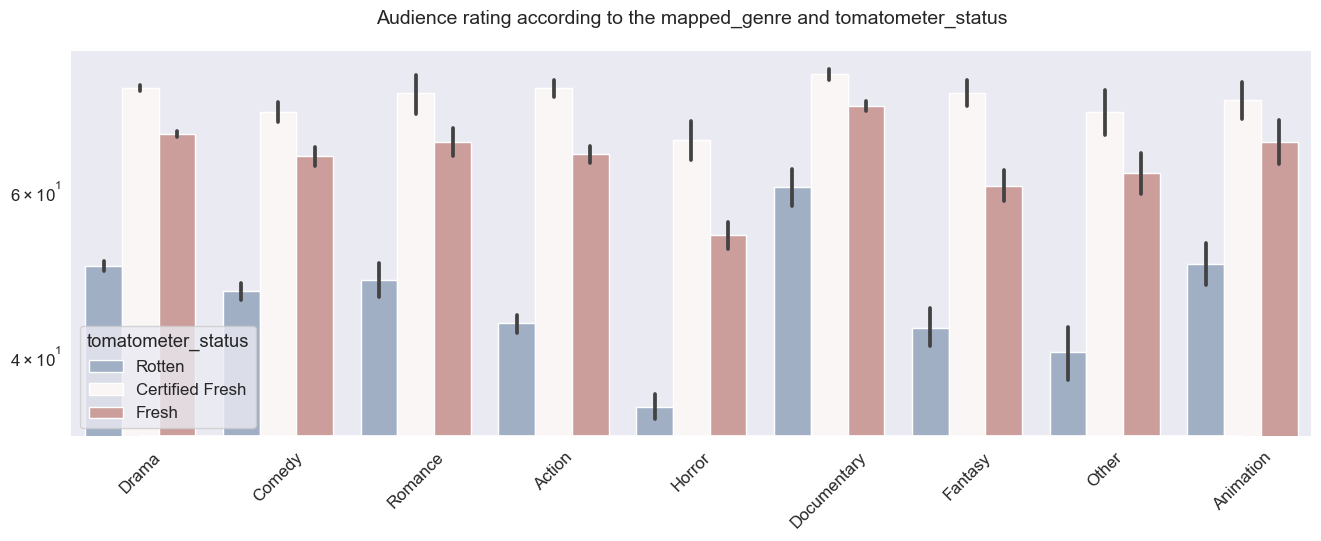

In [270]:
plt.figure(figsize=(16,5))
sns.barplot(x='mapped_genre', y='audience_rating', hue='tomatometer_status', data= df, palette='vlag')

# visual presentation
sns.despine(trim=True, left=True)
plt.ylabel('')
plt.xlabel('')
plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Audience rating according to the mapped_genre and tomatometer_status', size=14, y=1.05)
plt.show()

### 1.6.3 Multivariate Analysis

### 1.6.3.1 Pairplot

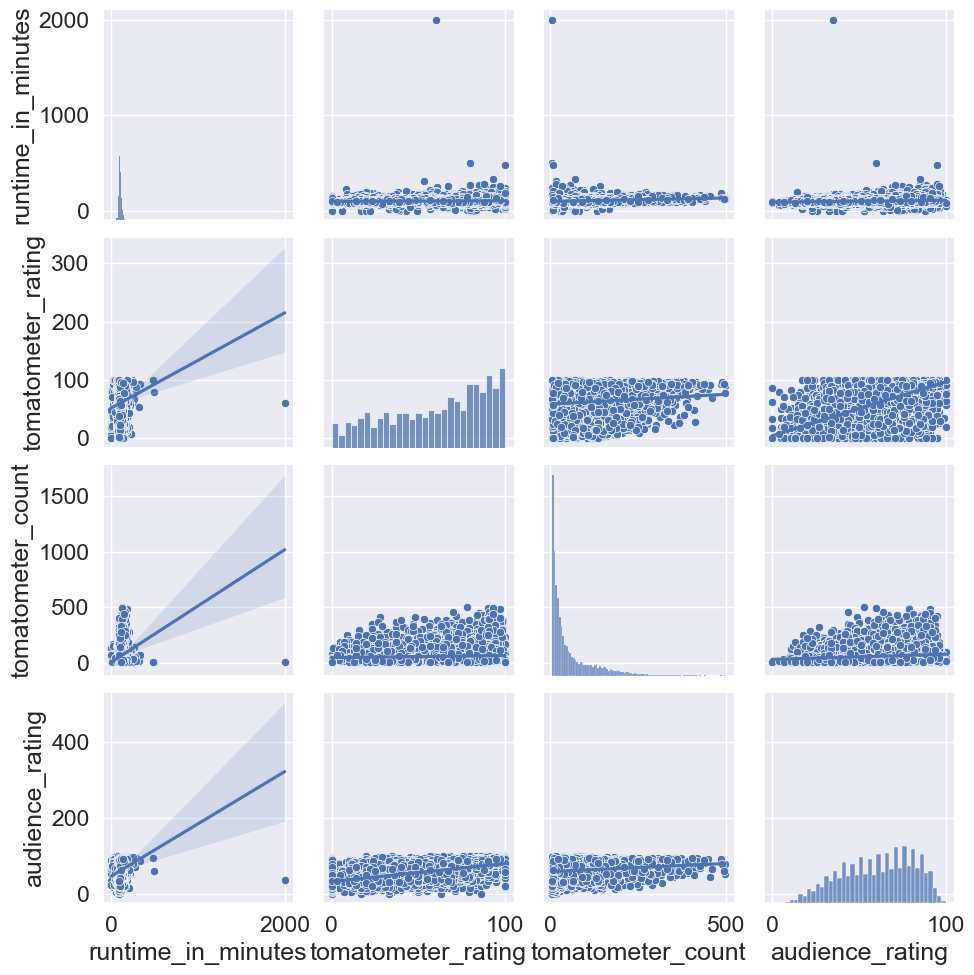

In [271]:
sns.set(font_scale=1.5)  
grid = sns.pairplot(df, palette = "coolwarm")

# Add a regression line for non-diagonal plots
for ax in grid.axes.flat[1:-1]: # first and last axes are not considered
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=df, x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()

**Based on the pairplot, here are the correlations between the variables:**

Positive Correlations:

1)Runtime vs. Tomatometer Rating: Moderate positive correlation. Longer movies tend to have slightly higher Tomatometer ratings.

2)Runtime vs. Tomatometer Count: Moderate positive correlation. Longer movies tend to have more reviews.

3)Tomatometer Rating vs. Tomatometer Count: Strong positive correlation. Movies with higher Tomatometer ratings tend to have more reviews.

4)Tomatometer Rating vs. Audience Rating: Moderate positive correlation. Movies with higher Tomatometer ratings tend to have higher audience ratings.

5)Tomatometer Count vs. Audience Rating: Weak positive correlation. Movies with more reviews tend to have slightly higher audience ratings.

6)Runtime vs. Audience Rating: There's a moderate positive correlation. Longer movies tend to have more audience rating.

### 1.6.3.2 Correlation between 'Audience rating' with independent variables

In [272]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical columns
cor = numerical_df.corr()

# Display the correlation matrix
cor

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
runtime_in_minutes,1.000000,0.071323,0.191955,0.168488
tomatometer_rating,0.071323,1.000000,0.079630,0.660209
tomatometer_count,0.191955,0.079630,1.000000,0.140989
audience_rating,0.168488,0.660209,0.140989,1.000000


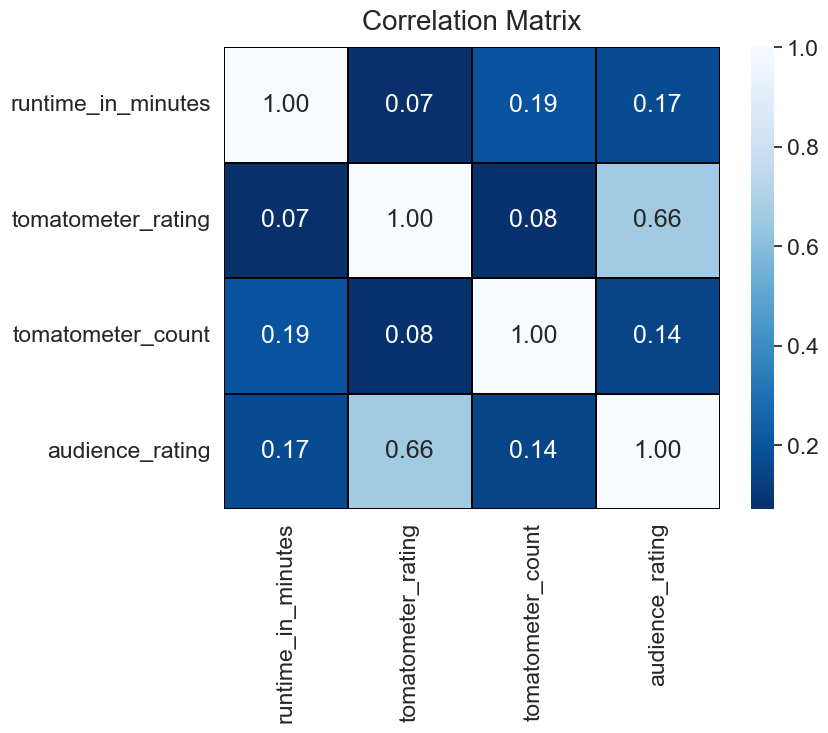

In [276]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.5)

sns.heatmap(cor, linewidths = 0.1, fmt = ".2f", linecolor = 'black', cmap='Blues_r', annot=True)
plt.yticks(rotation = 0)
plt.title('Correlation Matrix', size=20, y=1.02)
plt.show()

**=>0-no relation**

**==>-0.3 to 0.3 less relation**

**==>greater than -0.5 or 0.5 greater than(moderate correlation)**

**==>greater than -0.7 or 0.7 greater than(high correlation)**

**1) From above heatmap we can see,there are positive correlation between label and feature columns.**

**2)The 'audience_rating' variable shows a moderate positive correlation with 'tomatometer Rating' (+0.66),runtime_in_minutes(+0.17),tomatometer_count(+0.14)**.

**3)The 'runtime_in_minutes' variable shows a positive correlation with 'tomatometer_count(+0.19).**

# 2. Preprocessing Data

### 2.1 Missing values

In [277]:
#Checking the null values

missing_val=df.isnull().sum().to_frame("Null Values")

#Calculate the % of the null values

missing_val["% of missing Values"]=round(missing_val['Null Values'] / len(df) * 100, 2)

missing_val

,Null Values,% of missing Values
rating,0,0.00
runtime_in_minutes,155,0.93
tomatometer_status,0,0.00
tomatometer_rating,0,0.00
tomatometer_count,0,0.00
audience_rating,252,1.51
mapped_genre,0,0.00


### 2.1.1 Dropping missing values less than 2% of missing


Statistically, it is generally acceptable to omit observations with missing values if they constitute less than 5% of the overall sample. Therefore, we will establish a threshold of 2% for removal of missing observations

In [279]:
missing_val[(missing_val['% of missing Values'] > 0) & (missing_val['% of missing Values']<2)]

,Null Values,% of missing Values
runtime_in_minutes,155,0.93
audience_rating,252,1.51


In [281]:
# Dropping the missing values with % of missing less than 2%
df_new = df.dropna(subset=['runtime_in_minutes','audience_rating'])

print(f"{df.shape[0] - df_new.shape[0]} rows with missing values were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df = df_new.copy()


399 rows with missing values were deleted.
This represent 2.4% of the data.
In the new dataset there are 16238 rows and 7 columns.


### 2.1.2 Last check for missing value

In [283]:
df.isnull().sum().sum()

0

### 2.2 Feature Engineering

### 2.2.1 Encoding categorical columns

In [285]:
encoding_col = [ 'rating', 'tomatometer_status', 'mapped_genre']
encoding_col

['rating', 'tomatometer_status', 'mapped_genre']

In [286]:
from sklearn.preprocessing import LabelEncoder

category_mappings = {}

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
for col in encoding_col:
    df[col] = label_encoder.fit_transform(df[col])
    
    # Store the mapping in a dictionary
    category_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(f"{col}: \n{category_mappings[col]}\n")
    
display(df.head())
display(df.tail())

rating: 
{'G': 0, 'NC17': 1, 'NR': 2, 'PG': 3, 'PG-13': 4, 'PG-13)': 5, 'R': 6, 'R)': 7}

tomatometer_status: 
{'Certified Fresh': 0, 'Fresh': 1, 'Rotten': 2}

mapped_genre: 
{'Action': 0, 'Animation': 1, 'Comedy': 2, 'Documentary': 3, 'Drama': 4, 'Fantasy': 5, 'Horror': 6, 'Other': 7, 'Romance': 8}



,rating,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,mapped_genre
0,3,83.0,2,49,144,53.0,4
1,6,90.0,0,86,140,64.0,2
2,6,118.0,1,68,22,53.0,8
3,2,95.0,0,100,51,97.0,4
4,0,127.0,1,89,27,74.0,4


,rating,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,mapped_genre
16633,6,104.0,2,56,9,74.0,4
16634,3,108.0,0,97,279,92.0,0
16635,2,142.0,1,78,9,87.0,4
16636,3,139.0,1,95,21,91.0,4
16637,3,117.0,2,57,7,62.0,4


### 2.3 Removing outliers

In [287]:
features_with_outliers = ['tomatometer_count', 'runtime_in_minutes']
features_with_outliers

['tomatometer_count', 'runtime_in_minutes']

We selected the features with outliers from the Univariate Analysis and considered only the continuous ones. 

In [288]:
# Detect outliers with zscore method
from scipy.stats import zscore

z = np.abs(zscore(df[features_with_outliers]))
z

,tomatometer_count,runtime_in_minutes
0,1.311680,0.781362
1,1.251353,0.501797
2,0.528288,0.616465
3,0.090918,0.302107
4,0.452879,0.975907
...,...,...
16633,0.724350,0.057334
16634,3.347710,0.217086
16635,0.724350,1.574976
16636,0.543370,1.455162


In [289]:
# threshold = 3
df_new = df[(z<3).all(axis=1)]

print(f"{df.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")

df = df_new.copy()
df

450 rows with outliers were deleted.
This represent 2.77% of the data.
In the new dataset there are 15788 rows and 7 columns.


,rating,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,mapped_genre
0,3,83.0,2,49,144,53.0,4
1,6,90.0,0,86,140,64.0,2
2,6,118.0,1,68,22,53.0,8
3,2,95.0,0,100,51,97.0,4
4,0,127.0,1,89,27,74.0,4
...,...,...,...,...,...,...,...
16632,3,88.0,2,3,66,33.0,0
16633,6,104.0,2,56,9,74.0,4
16635,2,142.0,1,78,9,87.0,4
16636,3,139.0,1,95,21,91.0,4


Since we can not afford to lose more than 10% of the data, we have selectively retained the continuous variables with outliers based on the Univariate Analysis. Adopting a threshold of 3, the data culling process resulted in a loss of only 2.77%. As a consequence, our current dataset comprises 15788  rows and 7 columns.

### 2.4 Skewness Correction

In [290]:
# Checking the skewness in the data
df_skew = df.skew().sort_values(ascending=False).to_frame("Skew")
df_skew

,Skew
tomatometer_count,1.524879
runtime_in_minutes,0.772206
rating,-0.133936
mapped_genre,-0.229622
audience_rating,-0.291674
tomatometer_rating,-0.398026
tomatometer_status,-0.476981


**Skewness acceptable range -0.5 to +0.5**

In [291]:
# Subsetting the features with a skew > 0.5
skew_columns = df_skew[abs(df_skew['Skew']) > 0.5].index.to_list()
skew_columns = sorted(skew_columns)
skew_columns

['runtime_in_minutes', 'tomatometer_count']

Considering the skewness of the continuous numerical columns:

==>runtime_in_minutes (0.772206)

==>tomatometer_count (1.524879)

We are going to use the cube-root method, square-root method, and log method to transform the columns with a skewness of more than 0.5. Later, we will compare the resulting skewness in order to select the best transform method.

In [292]:
skew_columns

['runtime_in_minutes', 'tomatometer_count']

In [293]:
# Checking skewness using cuberoot method,square method and log method
df_transformed = pd.DataFrame()

for col in skew_columns:
    df_transformed[f"{col}_cbrt"] = np.cbrt(df[col])
    df_transformed[f"{col}_sqrt"] = np.sqrt(df[col])
    df_transformed[f"{col}_log"] = np.log(df[col])
    
# Adding the other columns
df_transformed = pd.concat([df_transformed, df[skew_columns]], axis=1)

In [294]:
#Comparing which transform method give better results
df_transformed.skew().sort_index(ascending=False).to_frame("Skewness")

,Skewness
tomatometer_count_sqrt,0.868718
tomatometer_count_log,0.140951
tomatometer_count_cbrt,0.632240
tomatometer_count,1.524879
runtime_in_minutes_sqrt,0.334874
runtime_in_minutes_log,-0.211496
runtime_in_minutes_cbrt,0.169114
runtime_in_minutes,0.772206


After comparing the resulting skewness, we are going to apply the log method for tomatometer_count, and cube-root method to runtime_in_minutes.

In [295]:
# Transform the tomatometer_count column using log method
df['tomatometer_count'] = np.log(df['tomatometer_count'])

In [296]:
# Transform the runtime_in_minutes column using cuberoot method
df['runtime_in_minutes'] = np.cbrt(df['runtime_in_minutes'])

In [297]:
df[skew_columns].skew().sort_values(ascending=False).to_frame("Skewness after transform")

,Skewness after transform
runtime_in_minutes,0.169114
tomatometer_count,0.140951


After transform the data with cube-root and log method, we can continue with the analysis.

# 2.5 Feature Scaling using Standard Scalarization

### 2.5.1 Separating features and label

In [300]:
 #Separating the independent and target variables into x and y 
x = df.drop('audience_rating', axis=1)
y = df['audience_rating']

print(f"Feature Dimension = {x.shape}")
print(f"Label Dimension = {y.shape}")

Feature Dimension = (15788, 6)
Label Dimension = (15788,)


### 2.5.2 Scaling

In [303]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling the data 
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

x.head()

,rating,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,mapped_genre
0,-0.477953,-1.115927,0.991120,-0.382674,1.449602,0.241315
1,1.143315,-0.652301,-1.737592,0.911162,1.423672,-0.915999
2,1.143315,0.992900,-0.373236,0.281728,-0.279726,2.555943
3,-1.018375,-0.335673,-1.737592,1.400722,0.494179,0.241315
4,-2.099220,1.465553,-0.373236,1.016068,-0.091222,0.241315


We have scaled the data using the Standard Scalarization method to overcome the issue of biases.

# 2.6 Muticollinearity Analysis and Feature Selection

### 2.6.1 Checking Variance Inflation Factor (VIF)

In [304]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
2,tomatometer_status,3.294142
3,tomatometer_rating,3.201289
4,tomatometer_count,1.289973
0,rating,1.186464
1,runtime_in_minutes,1.071477
5,mapped_genre,1.019263


==>If VIF value is greater than 10,consider it as a sign of multicollinearity,we can see after the standardization there is no multicollinearity issue (No value is greater than 10).

# 3. Modeling

In [305]:
# Import Regression Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error 
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

### 3.1 Finding the best random state

In [306]:
def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        # Adapt to Regression Models
        acc = r2_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]

In [307]:
%%time
# Build the model
model = LinearRegression()
random_state, acc = find_best_random_state(model, x, y) 
print(f"Maximum r2 score is {round(acc,4)} at random_state {random_state}")

Maximum r2 score is 0.4999 at random_state 141
CPU times: total: 3.67 s
Wall time: 1.95 s


### 3.2 Creating train test split

In [308]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (11051, 6)
x_test shape:   (4737, 6)
y_train shape:  (11051,)
y_test shape:   (4737,)


### 3.3 Creating a Function with R2_score,Mean_Absolute_Error,Mean_Squared_Error,Random_mean_squared_error, difference between R2 score and cross validation

In [309]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n================Train Result=============")
        
        print(f"R2_Score:{r2_score(y_train,y_pred)*100:.2f}%")  #r2_score for train result
              
    
    elif train==False:
        pred=clf.predict(x_test)
              
        print("\n================Test Result=============")
        
        print(f"R2_Score:{r2_score(y_test,pred)*100:.2f}%")  #r2_score for test result
        
        print("\n Mean_Absolute_Error:",mean_absolute_error(y_test,pred))
        
        print("\n Mean_Squared_Error:",mean_squared_error(y_test,pred))
        
        print("\n Random_mean_squared_error:",np.sqrt(mean_squared_error(y_test,pred)))
              
        
        score=cross_val_score(clf,x,y)
        print('\n',score)
        print('\n',score.mean())
        print("\n Difference between R2_score and cross validation is:",r2_score(y_test,pred)-score.mean()) #Difference between r2_score and cross validation(to find which model is best)

### 3.3.1 LinearRegression

In [310]:
clf=LinearRegression()
clf.fit(x_train,y_train)

LinearRegression()

In [311]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:45.48%

================Test Result=============
R2_Score:49.99%

 Mean_Absolute_Error: 11.711038202727654

 Mean_Squared_Error: 213.29451770727118

 Random_mean_squared_error: 14.604606044233826

 [0.5175399  0.46376797 0.43511624 0.47026712 0.44998797]

 0.46733584075338913

 Difference between R2_score and cross validation is: 0.03252716360952507


### 3.3.2 RandomForestRegressor

In [312]:
clf=RandomForestRegressor()
clf.fit(x_train,y_train)

RandomForestRegressor()

In [313]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:91.17%

================Test Result=============
R2_Score:47.44%

 Mean_Absolute_Error: 11.813446520301175

 Mean_Squared_Error: 224.16146591069628

 Random_mean_squared_error: 14.972022772848574

 [0.47858515 0.44545305 0.38964551 0.44647477 0.43493813]

 0.4390193211739346

 Difference between R2_score and cross validation is: 0.03536265871340505


### 3.3.3 SVR

In [314]:
clf=SVR()
clf.fit(x_train,y_train)

SVR()

In [315]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:49.00%

================Test Result=============
R2_Score:52.45%

 Mean_Absolute_Error: 11.250348109075604

 Mean_Squared_Error: 202.79424918293518

 Random_mean_squared_error: 14.240584580098359

 [0.54467898 0.49035892 0.4618214  0.50017837 0.47586679]

 0.4945808916725623

 Difference between R2_score and cross validation is: 0.029903339759823122


### 3.3.4 KNeighborsRegressor

In [316]:
clf=KNN()
clf.fit(x_train,y_train)

KNeighborsRegressor()

In [317]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:61.00%

================Test Result=============
R2_Score:46.46%

 Mean_Absolute_Error: 11.912476250791642

 Mean_Squared_Error: 228.3238420941524

 Random_mean_squared_error: 15.110388548748587

 [0.45249607 0.43492706 0.37907399 0.44418319 0.42966253]

 0.42806856713802127

 Difference between R2_score and cross validation is: 0.036553394810356854


### 3.3.5 Lasso

In [318]:
clf=Lasso()
clf.fit(x_train,y_train)

Lasso()

In [319]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:44.34%

================Test Result=============
R2_Score:48.35%

 Mean_Absolute_Error: 12.032706381404733

 Mean_Squared_Error: 220.28321236402613

 Random_mean_squared_error: 14.841940990450883

 [0.49936339 0.45337345 0.43342532 0.45758601 0.44033439]

 0.45681651203981205

 Difference between R2_score and cross validation is: 0.026659269685474996


### 3.3.6 Ridge

In [320]:
clf=Ridge()
clf.fit(x_train,y_train)

Ridge()

In [321]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:45.48%

================Test Result=============
R2_Score:49.99%

 Mean_Absolute_Error: 11.711180900605676

 Mean_Squared_Error: 213.29648401476007

 Random_mean_squared_error: 14.604673362138575

 [0.51753969 0.46376791 0.43512017 0.47026533 0.4499864 ]

 0.46733589934278863

 Difference between R2_score and cross validation is: 0.03252249438535382


### 3.3.7 GradientBoostingRegressor

In [322]:
clf=GradientBoostingRegressor()
clf.fit(x_train,y_train)

GradientBoostingRegressor()

In [323]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:52.48%

================Test Result=============
R2_Score:53.81%

 Mean_Absolute_Error: 11.192387480680592

 Mean_Squared_Error: 196.97721873727497

 Random_mean_squared_error: 14.034857275272698

 [0.55010552 0.51369222 0.48268025 0.51740071 0.50064277]

 0.5129042932207406

 Difference between R2_score and cross validation is: 0.025219820576623198


### 3.3.8 DecisionTreeRegressor

In [328]:
clf=DecisionTreeRegressor()
clf.fit(x_train,y_train)

DecisionTreeRegressor()

In [329]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:98.71%

================Test Result=============
R2_Score:2.31%

 Mean_Absolute_Error: 15.968404756878476

 Mean_Squared_Error: 416.61643562498534

 Random_mean_squared_error: 20.411184081894547

 [ 0.02006289  0.00501925 -0.08174599 -0.01883792 -0.00857731]

 -0.016815817811465305

 Difference between R2_score and cross validation is: 0.03992576603584781


From the summary of the models results and comparing the cross-validation scores (CV_Mean) and R2 score (test), we conclude GradientBoostingRegressor is our best-performing model since the two metrics are very close , this indicates that the model is performing consistently on both the test set and across different folds in cross-validation.

This consistency is a positive sign, suggesting that the model generalizes well to new data.

In order to apply Hyper Parameter tunning we are going to select **GradientBoostingRegressor as our final model.**

# 3.4 Hyper Parameter Tuning

### 3.4.1 Finding the best parameters for GradientBoostingRegressor

In [330]:
random_state

141

In [331]:
GradientBoostingRegressor().get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [332]:
%%time
# GradientBoostingRegressor
# Define hyperparameter distribution
param_dist = {
    'n_estimators': np.arange(100, 1000, 50),  # Number of boosting stages
    'learning_rate': np.arange(0.01, 0.2, 0.01),  # Learning rate
    'max_depth': np.arange(3, 10),  # Maximum depth of individual trees
    'min_samples_split': np.arange(2, 21),  # Minimum samples required for splitting
    'min_samples_leaf': np.arange(1, 11),  # Minimum samples required for a leaf
    'subsample': np.arange(0.5, 1.0, 0.1)   # Subsample ratio for each tree
}

# Create Gradient Boosting Regressor model
model = GradientBoostingRegressor()

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=random_state)
random_search.fit(x_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'subsample': 0.6, 'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_depth': 4, 'learning_rate': 0.13}
CPU times: total: 1.31 s
Wall time: 1min 45s


In [333]:
# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters for GradientBoostingRegressor model:")
best_params

Best Parameters for GradientBoostingRegressor model:


{'subsample': 0.6,
 'n_estimators': 100,
 'min_samples_split': 3,
 'min_samples_leaf': 5,
 'max_depth': 4,
 'learning_rate': 0.13}

In [334]:
best_model

GradientBoostingRegressor(learning_rate=0.13, max_depth=4, min_samples_leaf=5,
                          min_samples_split=3, subsample=0.6)

# 3.5 Final Regression Model to predict audience rating

In [350]:
# Create the model with the best parameters
best_model = GradientBoostingRegressor(learning_rate=0.13, max_depth=4, min_samples_leaf=5,
                          min_samples_split=3, subsample=0.6)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the r2 score
r2_score_val = r2_score(y_test, y_pred)
print(f"Maximum R2 score: {r2_score_val*100:.2f}%")

Maximum R2 score: 53.84%


### 3.5.1 Saving the model

In [351]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "models/audiencerating_regressor_model.pkl")

['models/audiencerating_regressor_model.pkl']

### 3.5.2 Predicting the saved model

In [354]:
# Lets load the saved model and get the predictions
model = joblib.load("models/audiencerating_regressor_model.pkl")

# Prediction
prediction = model.predict(x_test)

# Maximum R2 score of the prediction with the model selected
print(f"Maximum R2 score: {r2_score(y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T

Maximum R2 score: 53.844 %


,0,1,2,3,4,5,6,7,8,9,...,4727,4728,4729,4730,4731,4732,4733,4734,4735,4736
Predicted,42.520069,79.660201,57.070141,43.651772,47.682448,61.828848,60.111434,75.17897,33.843404,76.46108,...,50.08012,74.614583,51.199594,38.345482,61.002127,58.738867,72.519279,82.048151,84.151399,48.066828
Original,34.000000,69.000000,51.000000,86.000000,55.000000,61.000000,77.000000,71.00000,49.000000,88.00000,...,39.00000,77.000000,74.000000,24.000000,59.000000,73.000000,70.000000,92.000000,85.000000,42.000000


# Final Conclusions:
    
    ==>These values represent the predictions on the fraction of the dataset reserved for testing, enabling a comparison with an accuracy of 53.844 %.

### The best model was GradientBoostingRegressor with R2 score: 53.844%